# DSAI5102 Midterm Project: Analysis on NeurIPS papers

## Section 1: Import Categorized Paper List

In [ ]:
# pip install pandas numpy matplotlib seaborn
# pip install scikit-learn
# pip install statsmodels
# pip install prophet

In [ ]:
# from google.colab import drive
# try:
#     drive.mount('/content/drive')
#     print("Google Drive mounted successfully!")
# except Exception as e:
#     print(f"Google Drive mount failed: {e}")
#     print("Please ensure you are running in a Google Colab environment.")

Mounted at /content/drive
Google Drive mounted successfully!


In [ ]:
# import os
# import shutil

# # Define source and destination paths
# # Please change to your path of df_final_with_topics.csv
# source_path = "/content/drive/MyDrive/DSAI5102/df_final_with_topics.csv"
# destination_dir = "/content/data"
# destination_path = os.path.join(destination_dir, os.path.basename(source_path))

# # Create the destination directory if it doesn't exist
# os.makedirs(destination_dir, exist_ok=True)

# # Copy the file
# try:
#     shutil.copy(source_path, destination_path)
#     print(f"File copied successfully from {source_path} to {destination_path}")
# except FileNotFoundError:
#     print(f"Error: Source file not found at {source_path}")
# except Exception as e:
#     print(f"Error copying file: {e}")

File copied successfully from /content/drive/MyDrive/DSAI5102/df_final_with_topics.csv to /content/data/df_final_with_topics.csv


In [2]:
import pandas as pd

destination_path = "./df_final_with_topics.csv"
# Read the CSV file into a pandas DataFrame
try:
    df_full = pd.read_csv(destination_path)
    print(f"Successfully read {destination_path}")

    # Create a new DataFrame without 'paper_text' and 'processed_text' columns
    df_no_text = df_full.drop(columns=['paper_text', 'processed_text'])

    # Display the first few rows of the full DataFrame
    print("\nFirst few rows of the full DataFrame:")
    display(df_full.head())

    # Display the first few rows of the no-text DataFrame
    print("\nFirst few rows of the subset DataFrame:")
    display(df_no_text.head())

except FileNotFoundError:
    print(f"Error: CSV file not found at {destination_path}")
except Exception as e:
    print(f"Error reading CSV file: {e}")

Successfully read ./df_final_with_topics.csv

First few rows of the full DataFrame:


,year,title,abstract,paper_text,authors_list,processed_text,topic_id,topic_label
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,"['Hisashi Suzuki', 'Suguru Arimoto']","['selforgan', 'associ', 'databas', 'applic', '...",5,计算机视觉 (Computer Vision)
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,['Christopher L. Scofield'],"['mean', 'field', 'theori', 'layer', 'iv', 'vi...",15,视觉神经科学 (Visual Neuroscience)
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,"['Patric K. Stanton', 'Terrence J. Sejnowski']","['store', 'covari', 'associ', 'longterm', 'pot...",15,视觉神经科学 (Visual Neuroscience)
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...,"['Gerhard Paass', 'J?rg Kindermann']","['bayesian', 'queri', 'construct', 'neural', '...",11,贝叶斯推断 (Bayesian Inference)
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a...","['Anders Krogh', 'Jesper Vedelsby']","['neural', 'network', 'ensembl', 'cross', 'val...",4,经典神经网络 (Classic NN)



First few rows of the subset DataFrame:


,year,title,abstract,authors_list,topic_id,topic_label
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,"['Hisashi Suzuki', 'Suguru Arimoto']",5,计算机视觉 (Computer Vision)
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,['Christopher L. Scofield'],15,视觉神经科学 (Visual Neuroscience)
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,"['Patric K. Stanton', 'Terrence J. Sejnowski']",15,视觉神经科学 (Visual Neuroscience)
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,"['Gerhard Paass', 'J?rg Kindermann']",11,贝叶斯推断 (Bayesian Inference)
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"['Anders Krogh', 'Jesper Vedelsby']",4,经典神经网络 (Classic NN)


In [3]:
import ast

# Function to safely parse the authors_list column
def parse_authors(x):
    # If the input is already a list, return it
    if isinstance(x, list):
        return x
    # If the input is a string, attempt to parse it
    if isinstance(x, str):
        try:
            # Use ast.literal_eval for safe parsing of string representation of a list
            v = ast.literal_eval(x)
            # If the result is a list, return it
            if isinstance(v, list):
                return v
        except Exception:
            # If parsing with ast.literal_eval fails, try splitting the string
            pass
        # If parsing fails or the string is not a standard list representation,
        # attempt to split by comma and clean up the resulting strings
        return [s.strip() for s in x.strip("[]").split(",") if s.strip().strip("'").strip('"')]
    # If the input is neither a list nor a string, return an empty list
    return []

# Apply the parse_authors function to the 'authors_list' column
df_no_text["authors_list"] = df_no_text["authors_list"].apply(parse_authors)

In [4]:
# Display the data type of the 'authors_list' column in df_no_text
print("\nData type of 'authors_list' column in df_no_text:")
display(df_no_text['authors_list'].dtypes)


Data type of 'authors_list' column in df_no_text:


dtype('O')

## Section 2: Statistics on Overall / Recent Popular Topics


### Section 2a: Statistics on Annual Trend for Paper Counts

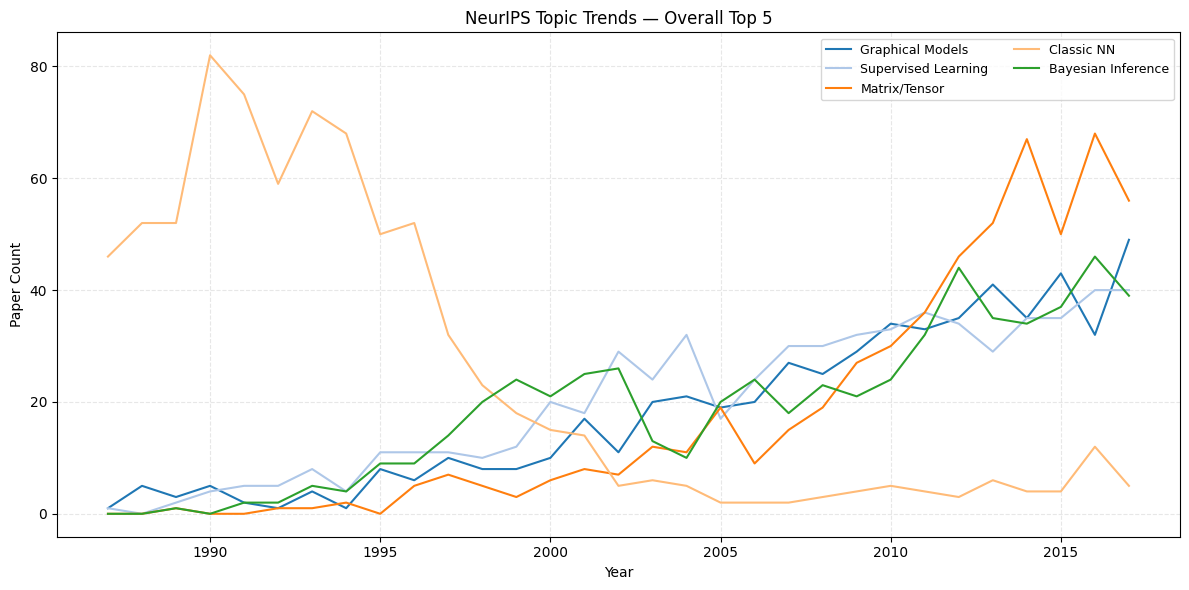

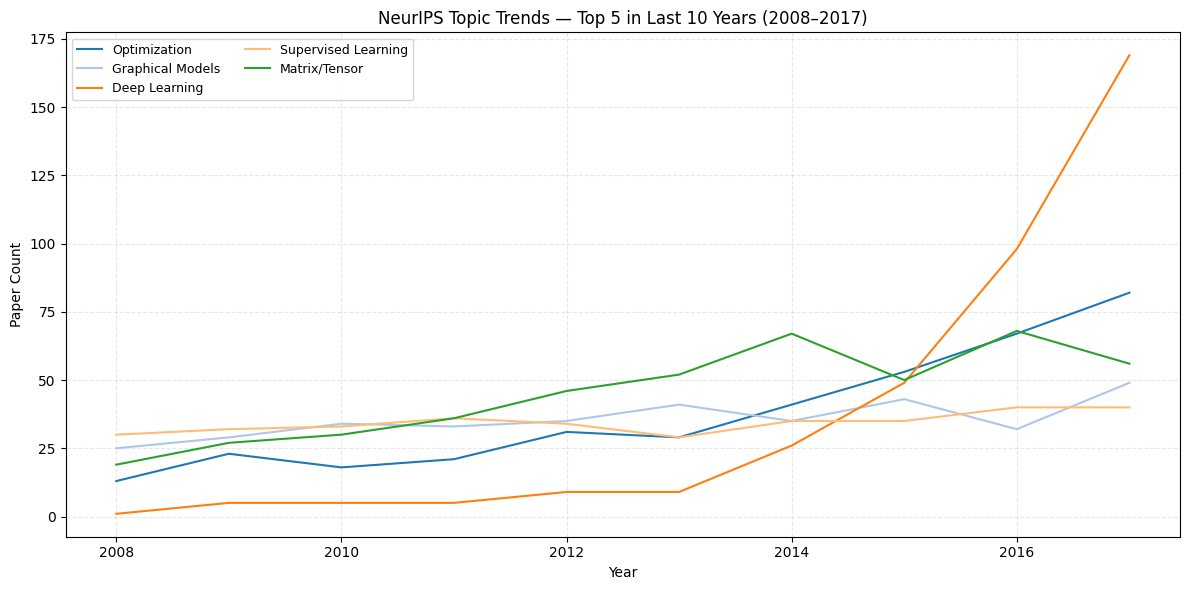


=== Overall Top 5 (cumulative counts) ===
 rank       display_label  total_count
    1          Classic NN          782
    2 Supervised Learning          622
    3  Bayesian Inference          582
    4       Matrix/Tensor          563
    5    Graphical Models          563

=== Top 5 in Last 10 Years (2008–2017) (cumulative counts) ===
 rank       display_label  total_count
    1       Matrix/Tensor          451
    2        Optimization          378
    3       Deep Learning          376
    4    Graphical Models          356
    5 Supervised Learning          344


In [5]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import re

# ------------ Unified Configuration ------------
TOPIC_COL = "topic_label"   # Use only topic_label for grouping and statistics

def label_for_plot(s: str) -> str:
    """Only for legend display: prioritize English in parentheses; otherwise, ASCII-ize to avoid missing character warnings for Chinese."""
    if isinstance(s, str):
        m = re.search(r"\(([^()]*)\)\s*$", s)
        if m and m.group(1).strip().isascii():
            return m.group(1).strip()
        # fallback: remove non-ASCII
        return s.encode("ascii", "ignore").decode()
    return str(s)

# Create a color map with at least 20 distinct colors
colors = matplotlib.colormaps.get_cmap('tab20') # Using a colormap with 20 distinct colors
color_list = [colors(i) for i in range(20)]


# ------------ Topic Annual Trend (Top-K) ------------
topic_year = (
    df_no_text.groupby([TOPIC_COL, "year"])
      .size()
      .reset_index(name="count")
      .sort_values([TOPIC_COL, "year"])
)

# === Unified adjustable: Top-K number ===
TOP_K_TOPICS = 5  # Change here to set how many curves you want to see

# === Last 10 years window ===
year_max = int(df_no_text["year"].max())
year_min = int(df_no_text["year"].min())
last10_start = max(year_max - 9, year_min)   # Max 10 years back
last10_label = f"{last10_start}–{year_max}"

# === 1) Cumulative Top-K for the entire period ===
overall_topK = (
    topic_year.groupby(TOPIC_COL)["count"]
    .sum()
    .sort_values(ascending=False)
    .head(TOP_K_TOPICS)
    .index
)

topic_year_overall_top = topic_year[topic_year[TOPIC_COL].isin(overall_topK)]
pivot_overall = (
    topic_year_overall_top
    .pivot(index="year", columns=TOPIC_COL, values="count")
    .fillna(0).astype(int)
)

plt.figure(figsize=(12,6))
for i, col in enumerate(pivot_overall.columns):
    plt.plot(pivot_overall.index, pivot_overall[col], label=label_for_plot(col), color=color_list[i % len(color_list)]) # Use colors from the list
plt.title(f"NeurIPS Topic Trends — Overall Top {TOP_K_TOPICS}")
plt.xlabel("Year"); plt.ylabel("Paper Count")
plt.legend(ncol=2, fontsize=9)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

# === 2) Cumulative Top-K for the last 10 years ===
topic_year_last10 = topic_year[topic_year["year"] >= last10_start]
last10_topK = (
    topic_year_last10.groupby(TOPIC_COL)["count"]
    .sum()
    .sort_values(ascending=False)
    .head(TOP_K_TOPICS)
    .index
)

topic_year_last10_top = topic_year_last10[topic_year_last10[TOPIC_COL].isin(last10_topK)]
pivot_last10 = (
    topic_year_last10_top
    .pivot(index="year", columns=TOPIC_COL, values="count")
    .fillna(0).astype(int)
)

plt.figure(figsize=(12,6))
for i, col in enumerate(pivot_last10.columns):
    plt.plot(pivot_last10.index, pivot_last10[col], label=label_for_plot(col), color=color_list[i % len(color_list)]) # Use colors from the list
plt.title(f"NeurIPS Topic Trends — Top {TOP_K_TOPICS} in Last 10 Years ({last10_label})")
plt.xlabel("Year"); plt.ylabel("Paper Count")
plt.legend(ncol=2, fontsize=9)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

# === Print only: Cumulative Top-K values for the entire period ===
overall_totals = (
    topic_year.groupby(TOPIC_COL)["count"]
    .sum()
    .sort_values(ascending=False)
)
overall_table = (
    overall_totals.reindex(overall_topK)  # Align by filter order
    .reset_index()
    .rename(columns={TOPIC_COL: "topic_label", "count": "total_count"})
)
overall_table.insert(0, "rank", range(1, len(overall_table) + 1))
overall_table["display_label"] = overall_table["topic_label"].map(label_for_plot)

print("\n=== Overall Top {} (cumulative counts) ===".format(TOP_K_TOPICS))
print(overall_table[["rank", "display_label", "total_count"]].to_string(index=False))

# === Print only: Cumulative Top-K values for the last 10 years ===
last10_totals = (
    topic_year_last10.groupby(TOPIC_COL)["count"]
    .sum()
    .sort_values(ascending=False)
)
last10_table = (
    last10_totals.reindex(last10_topK)
    .reset_index()
    .rename(columns={TOPIC_COL: "topic_label", "count": "total_count"})
)
last10_table.insert(0, "rank", range(1, len(last10_table) + 1))
last10_table["display_label"] = last10_table["topic_label"].map(label_for_plot)

print("\n=== Top {} in Last 10 Years {} (cumulative counts) ===".format(TOP_K_TOPICS, f"({last10_label})"))
print(last10_table[["rank", "display_label", "total_count"]].to_string(index=False))

### Section 2b: Statistics on Top Authors for Paper Counts

<Figure size 1800x600 with 0 Axes>

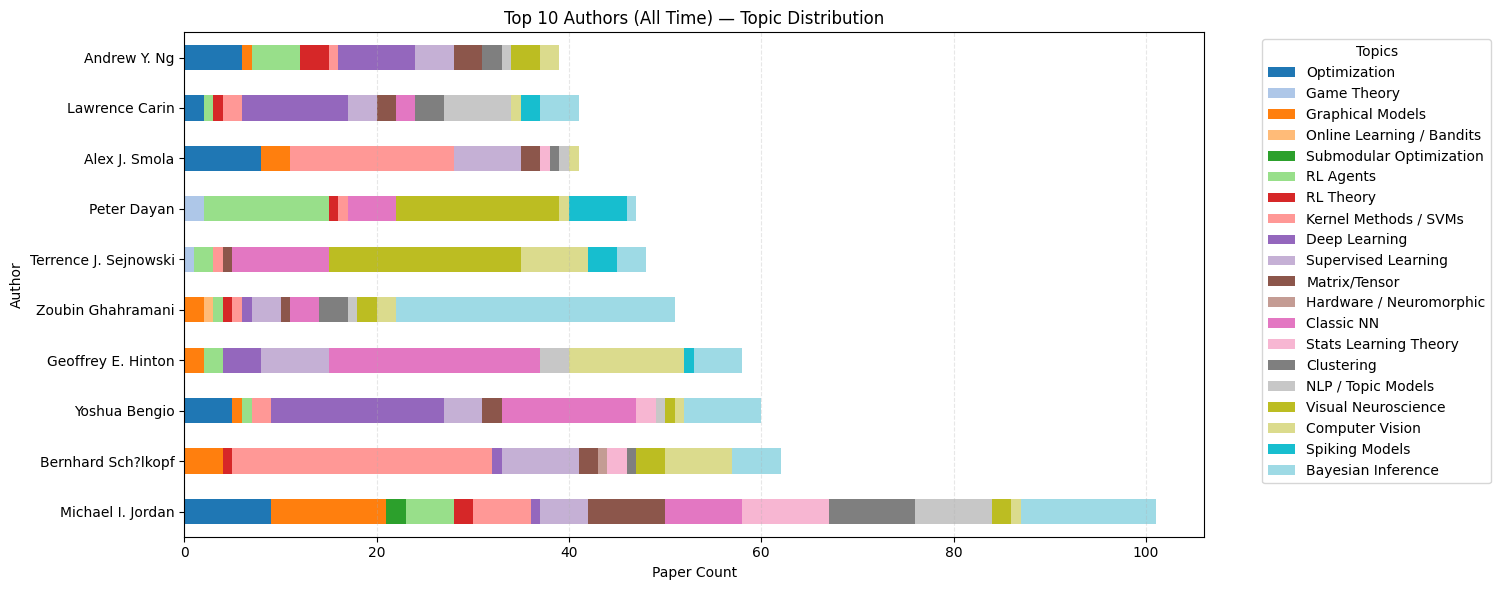


=== Top 10 Authors (All Time) and their main topics ===
 rank                author  total_papers                                                            top_topics
    1     Michael I. Jordan           101         Bayesian Inference(14), Graphical Models(12), Optimization(9)
    2    Bernhard Sch?lkopf            62 Kernel Methods / SVMs(27), Supervised Learning(8), Computer Vision(7)
    3         Yoshua Bengio            60              Deep Learning(18), Classic NN(14), Bayesian Inference(8)
    4    Geoffrey E. Hinton            58           Classic NN(22), Computer Vision(12), Supervised Learning(7)
    5     Zoubin Ghahramani            51         Bayesian Inference(29), Supervised Learning(3), Classic NN(3)
    6 Terrence J. Sejnowski            48           Visual Neuroscience(20), Classic NN(10), Computer Vision(7)
    7           Peter Dayan            47             Visual Neuroscience(17), RL Agents(13), Spiking Models(6)
    8         Alex J. Smola            41    Ke

<Figure size 1800x600 with 0 Axes>

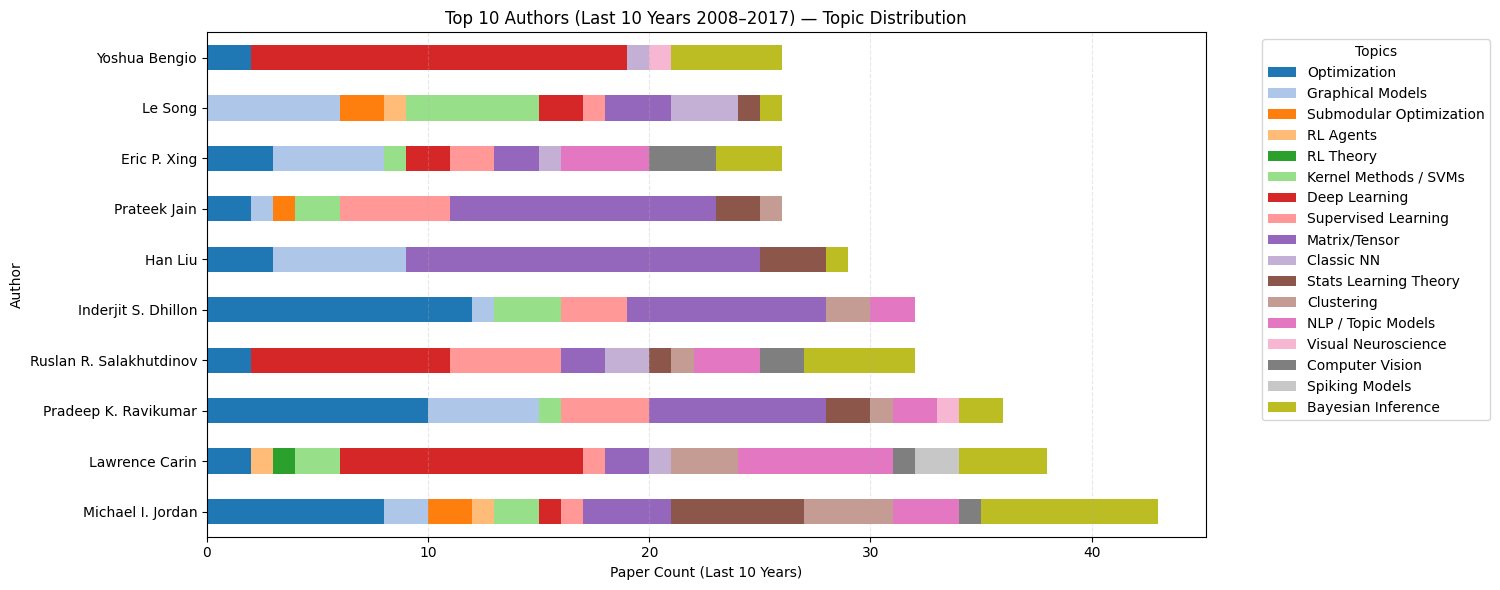


=== Top 10 Authors in Last 10 Years 2008–2017 and their main topics ===
 rank                  author  total_papers_last10y                                               top_topics_last10y
    1       Michael I. Jordan                    43 Optimization(8), Bayesian Inference(8), Stats Learning Theory(6)
    2          Lawrence Carin                    38  Deep Learning(11), NLP / Topic Models(7), Bayesian Inference(4)
    3    Pradeep K. Ravikumar                    36          Optimization(10), Matrix/Tensor(8), Graphical Models(5)
    4 Ruslan R. Salakhutdinov                    32  Deep Learning(9), Supervised Learning(5), Bayesian Inference(5)
    5     Inderjit S. Dhillon                    32     Optimization(12), Matrix/Tensor(9), Kernel Methods / SVMs(3)
    6                 Han Liu                    29          Matrix/Tensor(16), Graphical Models(6), Optimization(3)
    7            Prateek Jain                    26       Matrix/Tensor(12), Supervised Learning(5), Optimiz

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl # Import matplotlib for colormaps
import re

# ------------ Unified Configuration ------------
TOPIC_COL = "topic_label"   # Use only topic_label for grouping and statistics

def label_for_plot(s: str) -> str:
    """Only for legend display: prioritize English in parentheses; otherwise, ASCII-ize to avoid missing character warnings for Chinese."""
    if isinstance(s, str):
        m = re.search(r"\(([^()]*)\)\s*$", s)
        if m and m.group(1).strip().isascii():
            return m.group(1).strip()
        # fallback: remove non-ASCII
        return s.encode("ascii", "ignore").decode()
    return str(s)

# Create a color map with at least 20 distinct colors
colors = mpl.colormaps.get_cmap('tab20') # Updated to use mpl.colormaps.get_cmap
color_list = [colors(i) for i in range(20)]


# ------------ Common preparation: Explode author list ------------
authors_exploded = df_no_text.explode("authors_list").rename(columns={"authors_list": "author"})
authors_exploded["author"] = (
    authors_exploded["author"]
    .fillna("")
    .astype(str)
    .str.strip()
)
authors_exploded = authors_exploded[authors_exploded["author"] != ""]

# ========== Part A. Top 10 Authors (All Time) ==========
# 1) Calculate total paper counts for all authors and get Top 10
author_counts_all = (
    authors_exploded.groupby("author")["title"]
    .count()
    .sort_values(ascending=False) # Sort descending for plotting order
)
top10_authors_all = author_counts_all.head(10).index.tolist()
# Keep sorted descending for display later
author_counts_all_sorted_top10 = author_counts_all.loc[top10_authors_all]


# 2) Count papers per topic for Top 10 authors (All Time)
author_topic_all = (
    authors_exploded[authors_exploded["author"].isin(top10_authors_all)]
    .groupby(["author", TOPIC_COL])
    .size()
    .reset_index(name="count")
)

author_topic_pivot_all = (
    author_topic_all
    .pivot(index="author", columns=TOPIC_COL, values="count")
    .fillna(0)
    .astype(int)
)

# Reindex the pivot table to match the desired order (descending by total paper count)
author_topic_pivot_all = author_topic_pivot_all.reindex(top10_authors_all)


# 3) Create display-friendly English/ASCII column names for visualization (avoid Chinese)
disp_cols_all = {c: label_for_plot(c) for c in author_topic_pivot_all.columns}
author_topic_pivot_all_disp = author_topic_pivot_all.copy()
author_topic_pivot_all_disp.columns = [disp_cols_all[c] for c in author_topic_pivot_all.columns]

# 4) Plot stacked bar chart (All Time)
plt.figure(figsize=(18,6))
ax1 = author_topic_pivot_all_disp.plot(
    kind="barh", # Changed to barh for horizontal bar chart
    stacked=True,
    figsize=(18,6),
    color=color_list # Use the expanded color list
)
plt.title("Top 10 Authors (All Time) — Topic Distribution")
plt.xlabel("Paper Count") # Swapped xlabel and ylabel for horizontal plot
plt.ylabel("Author")
plt.grid(True, axis="x", linestyle="--", alpha=0.3) # Changed axis to x for horizontal grid
# Place legend outside the plot
ax1.legend(title="Topics", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to prevent legend overlapping
plt.show()

# 5) Print summary table for all-time authors to console
rows_all = []
for author in author_counts_all_sorted_top10.index:
    total_papers = int(author_counts_all_sorted_top10[author])
    row = {"author": author, "total_papers": total_papers}

    if author in author_topic_pivot_all.index:
        topic_series = author_topic_pivot_all.loc[author]
        topic_series = topic_series[topic_series > 0].sort_values(ascending=False)

        top_topics_for_author = []
        for tname, cnt in topic_series.head(3).items():
            top_topics_for_author.append(f"{label_for_plot(tname)}({int(cnt)})")
        row["top_topics"] = ", ".join(top_topics_for_author)
    else:
        row["top_topics"] = ""

    rows_all.append(row)

summary_all = pd.DataFrame(rows_all).sort_values(
    by="total_papers",
    ascending=False
).reset_index(drop=True)
summary_all.insert(0, "rank", range(1, len(summary_all)+1))

print("\n=== Top 10 Authors (All Time) and their main topics ===")
print(summary_all[["rank", "author", "total_papers", "top_topics"]].to_string(index=False))


# ========== Part B. Top 10 Authors (Last 10 Years) ==========
# Assuming you have already defined:
# year_max  = int(df_no_text["year"].max())
# year_min  = int(df_no_text["year"].min())
# last10_start = max(year_max - 9, year_min)  # Start year for the last 10 years window
# last10_label = f"{last10_start}–{year_max}"

# Filter data for the last 10 years
recent10 = authors_exploded[authors_exploded["year"] >= last10_start]

# 1) Count paper counts in the last 10 years
author_counts_last10 = (
    recent10.groupby("author")["title"]
    .count()
    .sort_values(ascending=False) # Sort descending for plotting order
)
top10_authors_last10 = author_counts_last10.head(10).index.tolist()
author_counts_last10_sorted_top10 = author_counts_last10.loc[top10_authors_last10]

# 2) Top 10 authors × topic in the last 10 years
author_topic_last10 = (
    recent10[recent10["author"].isin(top10_authors_last10)]
    .groupby(["author", TOPIC_COL])
    .size()
    .reset_index(name="count")
)

author_topic_pivot_last10 = (
    author_topic_last10
    .pivot(index="author", columns=TOPIC_COL, values="count")
    .fillna(0)
    .astype(int)
)

# Reindex the pivot table to match the desired order (descending by total paper count)
author_topic_pivot_last10 = author_topic_pivot_last10.reindex(top10_authors_last10)


# 3) Legend display friendly (prioritize English / remove Chinese)
disp_cols_last10 = {c: label_for_plot(c) for c in author_topic_pivot_last10.columns}
author_topic_pivot_last10_disp = author_topic_pivot_last10.copy()
author_topic_pivot_last10_disp.columns = [disp_cols_last10[c] for c in author_topic_pivot_last10.columns]

# 4) Plot stacked bar chart (Last 10 Years)
plt.figure(figsize=(18,6))
ax2 = author_topic_pivot_last10_disp.plot(
    kind="barh", # Changed to barh for horizontal bar chart
    stacked=True,
    figsize=(18,6),
    color=color_list # Use the expanded color list
)
plt.title(f"Top 10 Authors (Last 10 Years {last10_label}) — Topic Distribution")
plt.xlabel("Paper Count (Last 10 Years)") # Swapped xlabel and ylabel for horizontal plot
plt.ylabel("Author")
plt.grid(True, axis="x", linestyle="--", alpha=0.3) # Changed axis to x for horizontal grid
# Place legend outside the plot
ax2.legend(title="Topics", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to prevent legend overlapping
plt.show()

# 5) Print summary table for last 10 years authors to console
rows_last10 = []
for author in author_counts_last10_sorted_top10.index:
    total_papers = int(author_counts_last10_sorted_top10[author])
    row = {"author": author, "total_papers_last10y": total_papers}

    if author in author_topic_pivot_last10.index:
        topic_series = author_topic_pivot_last10.loc[author]
        topic_series = topic_series[topic_series > 0].sort_values(ascending=False)

        top_topics_for_author = []
        for tname, cnt in topic_series.head(3).items():
            top_topics_for_author.append(f"{label_for_plot(tname)}({int(cnt)})")
        row["top_topics_last10y"] = ", ".join(top_topics_for_author)
    else:
        row["top_topics_last10y"] = ""

    rows_last10.append(row)

summary_last10 = pd.DataFrame(rows_last10).sort_values(
    by="total_papers_last10y",
    ascending=False
).reset_index(drop=True)
summary_last10.insert(0, "rank", range(1, len(summary_last10)+1))

print(f"\n=== Top 10 Authors in Last 10 Years {last10_label} and their main topics ===")
print(summary_last10[["rank", "author", "total_papers_last10y", "top_topics_last10y"]].to_string(index=False))

## Section 3: Analysis on Topics Trend

### Section 3.1: Preprocessing on Topic Share and Cutoff Year



In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict

# ===========================
# CONFIG
# ===========================
TOPIC_COL   = "topic_label"

TARGET_YEAR = 2017          # Target year to forecast: which topics will be "hot" in this future year
CUTOFF_YEAR = TARGET_YEAR-1 # Observation horizon: only years <= this are visible when making the prediction

CORE_MIN_PAPERS = 4         # Minimum number of papers in the recent window for an author to be considered "core"
TOP_PCT = 0.25              # Fraction of topics per year labeled as "hot" (top X% by share within that year)
RANDOM_STATE = 42           # Random seed for reproducibility

FEATURE_COLS = [
    # "share_t",
    "share_t_ma3",
    "acceleration",
    "core_author_presence_t",
    "burst_ratio",
    "core_author_focus_boost_t",
    "core_author_presence_accel"
]


def step1_build_per_year_topic_stats(df_no_text, topic_year, TOPIC_COL, CUTOFF_YEAR, TARGET_YEAR):
    """
    Step 1. Build per-year topic statistics
    Goal: For each (topic, year), compute the paper count and its within-year share.
    share_t = papers_in_topic_year / all_papers_that_year
    This (topic × year) panel "ty" will be the base for later trend features
    and for defining which topics are considered "hot" in a given year.
    """

    # Total paper count per year
    year_total = (
        topic_year.groupby("year")["count"]
        .sum()
        .rename("year_total")
        .reset_index()
    )

    # Add total per-year volume back to each (topic, year) row
    ty_local = topic_year.merge(year_total, on="year", how="left").copy()

    # Relative share of this topic in that year (popularity proxy)
    ty_local["share"] = ty_local["count"] / ty_local["year_total"]

    # Make sure rows are ordered consistently
    ty_local = ty_local.sort_values([TOPIC_COL, "year"]).reset_index(drop=True)

    # Global year span in the dataset
    year_min_local = int(df_no_text["year"].min())
    year_max_local = int(df_no_text["year"].max())

    print(f"[INFO] Data year range: {year_min_local} .. {year_max_local}")
    print(f"[INFO] Training cutoff year: {CUTOFF_YEAR}  -> Forecast target year: {TARGET_YEAR}")
    print("[INFO] ty head:")
    print(ty_local.head())

    return ty_local, year_min_local, year_max_local


# ===== RUN STEP 1 NOW =====
ty, year_min, year_max = step1_build_per_year_topic_stats(
    df_no_text=df_no_text,
    topic_year=topic_year,
    TOPIC_COL=TOPIC_COL,
    CUTOFF_YEAR=CUTOFF_YEAR,
    TARGET_YEAR=TARGET_YEAR,
)


[INFO] Data year range: 1987 .. 2017
[INFO] Training cutoff year: 2016  -> Forecast target year: 2017
[INFO] ty head:
           topic_label  year  count  year_total     share
0  优化算法 (Optimization)  1987      1          90  0.011111
1  优化算法 (Optimization)  1989      2         101  0.019802
2  优化算法 (Optimization)  1990      3         143  0.020979
3  优化算法 (Optimization)  1991      4         144  0.027778
4  优化算法 (Optimization)  1992      2         127  0.015748


### Section 3.2: Preprocessing on Core Authors

In [8]:
def step2_identify_core_authors(df_no_text, year_min, CUTOFF_YEAR, CORE_MIN_PAPERS):
    # =====================================================================
    # Step 2. Identify core authors using only information available by CUTOFF_YEAR
    #
    # Goal:
    #   - Find "core authors": consistently productive researchers in the recent period.
    #   - These authors act as a signal of momentum: when many core authors focus on a topic,
    #     that topic often becomes influential in the near future.
    #
    # Definition:
    #   - Consider only papers published in the last 10 years up to and including CUTOFF_YEAR.
    #   - Count how many papers each author published in that window.
    #   - Authors with at least CORE_MIN_PAPERS papers in that window are labeled as "core".
    #
    # Notes:
    #   - No information from TARGET_YEAR or later is used.
    #   - This keeps the "core author" signal causal with respect to the forecast.
    # =====================================================================

    # Expand the authors_list column so that each (paper, author) pair is its own row
    authors_exploded_local = df_no_text.explode("authors_list").rename(columns={"authors_list": "author"})
    authors_exploded_local["author"] = (
        authors_exploded_local["author"]
        .fillna("")
        .astype(str)
        .str.strip()
    )
    authors_exploded_local = authors_exploded_local[authors_exploded_local["author"] != ""]

    # Determine the rolling "recent activity" window for defining core authors
    # Example: if CUTOFF_YEAR=2016, the window is [2007..2016]
    last10_start_for_cutoff = max(CUTOFF_YEAR - 9, year_min)

    recent10_for_cutoff = authors_exploded_local[
        (authors_exploded_local["year"] >= last10_start_for_cutoff) &
        (authors_exploded_local["year"] <= CUTOFF_YEAR)
    ].copy()

    print(f"[INFO] Core-author window: {last10_start_for_cutoff}..{CUTOFF_YEAR}")

    # Count per-author publication volume in that window
    author_counts_last10 = (
        recent10_for_cutoff.groupby("author")["title"]
        .count()
        .sort_values(ascending=False)
    )

    # Authors above the output threshold are considered "core"
    core_authors_local = set(
        author_counts_last10[author_counts_last10 >= CORE_MIN_PAPERS].index.tolist()
    )

    print(f"[INFO] #core_authors (>= {CORE_MIN_PAPERS} papers in window): {len(core_authors_local)}")
    print("[INFO] Sample top authors by volume:")
    print(list(author_counts_last10.head(10).items())[:5])

    return authors_exploded_local, core_authors_local


# ===== RUN STEP 2 NOW =====
authors_exploded, core_authors = step2_identify_core_authors(
    df_no_text=df_no_text,
    year_min=year_min,
    CUTOFF_YEAR=CUTOFF_YEAR,
    CORE_MIN_PAPERS=CORE_MIN_PAPERS,
)


[INFO] Core-author window: 2007..2016
[INFO] #core_authors (>= 4 papers in window): 596
[INFO] Sample top authors by volume:
[('Michael I. Jordan', 41), ('Pradeep K. Ravikumar', 35), ('Ruslan R. Salakhutdinov', 32), ('Inderjit S. Dhillon', 31), ('Lawrence Carin', 29)]


### Section 3.3: Extracting Author Features

In [9]:
def step3_build_author_features(authors_exploded, core_authors, CUTOFF_YEAR, TOPIC_COL):
    # =====================================================================
    # Step 3. Author-driven topic momentum features (years <= CUTOFF_YEAR)
    #
    # Goal:
    #   For each (topic, year), summarize how strongly established contributors
    #   (core authors) are participating in that topic.
    #
    # Features:
    #   - core_author_presence_t:
    #       Number of distinct core authors who published in this topic in that year.
    #
    #   - core_papers:
    #       Total number of papers in this topic in that year authored by core authors.
    #
    #   - core_total_papers_year:
    #       Total number of papers (all topics) authored by core authors in that same year.
    #
    #   - core_share_year_topic:
    #       Fraction of core-author output that went into this topic that year:
    #       core_papers / core_total_papers_year.
    #       This measures how much attention core authors allocate to the topic.
    #
    # These features are computed only with data from years <= CUTOFF_YEAR.
    # No information from TARGET_YEAR or later is used.
    # =====================================================================

    # Subset to only papers dated up to and including CUTOFF_YEAR
    cut_authors = authors_exploded[authors_exploded["year"] <= CUTOFF_YEAR].copy()

    # (1) For each (topic, year): number of papers by core authors
    core_topic_year_counts = (
        cut_authors[cut_authors["author"].isin(core_authors)]
        .groupby([TOPIC_COL, "year"])["title"]
        .count()
        .rename("core_papers")
        .reset_index()
    )

    # (2) For each year: total number of papers by core authors across all topics
    core_year_total = (
        cut_authors[cut_authors["author"].isin(core_authors)]
        .groupby("year")["title"]
        .count()
        .rename("core_total_papers_year")
        .reset_index()
    )

    # (3) For each (topic, year): number of distinct core authors active in that topic
    core_topic_year_authors = (
        cut_authors[cut_authors["author"].isin(core_authors)]
        .groupby([TOPIC_COL, "year"])["author"]
        .nunique()
        .rename("core_author_presence_t")
        .reset_index()
    )

    # Merge presence info with per-topic core paper counts
    feat_author_local = pd.merge(
        core_topic_year_authors,
        core_topic_year_counts,
        on=[TOPIC_COL, "year"],
        how="outer"
    )

    # Add per-year total core-author volume
    feat_author_local = pd.merge(
        feat_author_local,
        core_year_total,
        on="year",
        how="left"
    )

    # How much of core-author attention is spent on this topic in that year
    feat_author_local["core_share_year_topic"] = (
        feat_author_local["core_papers"] / feat_author_local["core_total_papers_year"]
    )

    # Keep only the feature columns needed later
    feat_author_local = feat_author_local[[
        TOPIC_COL,
        "year",
        "core_author_presence_t",
        "core_papers",
        "core_total_papers_year",
        "core_share_year_topic"
    ]].copy()

    print("[INFO] feat_author head:")
    print(feat_author_local.head())

    return feat_author_local


# ===== RUN STEP 3 NOW =====
feat_author = step3_build_author_features(
    authors_exploded=authors_exploded,
    core_authors=core_authors,
    CUTOFF_YEAR=CUTOFF_YEAR,
    TOPIC_COL=TOPIC_COL,
)


[INFO] feat_author head:
           topic_label  year  core_author_presence_t  core_papers  \
0  优化算法 (Optimization)  1992                       1            1   
1  优化算法 (Optimization)  1993                       2            2   
2  优化算法 (Optimization)  1994                       2            2   
3  优化算法 (Optimization)  1995                       4            5   
4  优化算法 (Optimization)  1996                       5            5   

   core_total_papers_year  core_share_year_topic  
0                      13               0.076923  
1                      25               0.080000  
2                      35               0.057143  
3                      39               0.128205  
4                      47               0.106383  


In [10]:
def step3b_core_author_focus_dynamics(feat_author, TOPIC_COL):
    # ---------------------------------------------------------------------
    # (Step 3 continued) Core-author focus dynamics
    #
    # Goal:
    #   For each topic and year (year <= CUTOFF_YEAR), estimate whether core authors
    #   are recently shifting more of their attention into this topic.
    #
    # Method:
    #   For each topic, sort by year ascending and compute, at each year y:
    #
    #     recent_block = years [y-2, y]
    #     prev_block   = years [y-5, y-3]
    #
    #   Using core_share_year_topic from the previous cell:
    #     recent_mean = average(core_share_year_topic on recent_block)
    #     prev_mean   = average(core_share_year_topic on prev_block)
    #
    #   Define:
    #     core_author_focus_boost_t = recent_mean / prev_mean
    #
    #   Interpretation:
    #     - > 1.0 : core authors are increasingly concentrating on this topic.
    #     - 1.0   : stable focus.
    #     - 0.0   : no recent focus or no baseline to compare.
    #
    # Notes:
    #   - Missing years in either block are treated as zero contribution.
    #   - Only information from years <= CUTOFF_YEAR is used.
    #   - The result is merged back as 'core_author_focus_boost_t'.
    # ---------------------------------------------------------------------

    def compute_focus_boost(feat_author_topic_df):
        """
        Compute core_author_focus_boost_t for one topic across multiple years.
        """
        df_t = feat_author_topic_df.sort_values("year").copy()
        years_arr = df_t["year"].values
        share_arr = df_t["core_share_year_topic"].fillna(0.0).values

        fb_list = []
        for i, y in enumerate(years_arr):
            # Recent ~3-year window ending at y
            recent_mask = (years_arr >= y-2) & (years_arr <= y)
            # Previous ~3-year window before that
            prev_mask   = (years_arr >= y-5) & (years_arr <= y-3)

            recent_val = share_arr[recent_mask].mean() if recent_mask.any() else 0.0
            prev_val   = share_arr[prev_mask].mean() if prev_mask.any() else 0.0

            if prev_val <= 0:
                # If there is no meaningful historical baseline,
                # treat any current presence as an emerging shift.
                fb = 0.0 if recent_val == 0 else 1.0
            else:
                fb = recent_val / prev_val

            fb_list.append(fb)

        df_t["core_author_focus_boost_t"] = fb_list
        return df_t

    feat_author_boost_local = (
        feat_author
        .groupby(TOPIC_COL, group_keys=False)
        .apply(compute_focus_boost)
        .reset_index(drop=True)
    )

    print("[INFO] feat_author_boost head:")
    print(feat_author_boost_local.head())

    return feat_author_boost_local


# ===== RUN STEP 3B NOW =====
feat_author_boost = step3b_core_author_focus_dynamics(
    feat_author=feat_author,
    TOPIC_COL=TOPIC_COL,
)


[INFO] feat_author_boost head:
           topic_label  year  core_author_presence_t  core_papers  \
0  优化算法 (Optimization)  1992                       1            1   
1  优化算法 (Optimization)  1993                       2            2   
2  优化算法 (Optimization)  1994                       2            2   
3  优化算法 (Optimization)  1995                       4            5   
4  优化算法 (Optimization)  1996                       5            5   

   core_total_papers_year  core_share_year_topic  core_author_focus_boost_t  
0                      13               0.076923                   1.000000  
1                      25               0.080000                   1.000000  
2                      35               0.057143                   1.000000  
3                      39               0.128205                   1.149841  
4                      47               0.106383                   1.239380  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3102400425.py:66: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_focus_boost)


### Section 3.4: Extracting Time Series Features of Topics

In [11]:
def step4_build_topic_time_series_features(ty, TOPIC_COL):
    # =====================================================================
    # Step 4. Topic-level time series features
    #
    # Goal:
    #   For each (topic, year), summarize how that topic's popularity is evolving
    #   over time based only on historical information up to that year.
    #
    # Source data:
    #   ty  contains, for each (topic, year):
    #       - count  : number of papers in that topic that year
    #       - share  : fraction of that year's total papers that belong to this topic
    #
    # For each topic, the function below iterates year by year in chronological order
    # and builds descriptive features. These features will later be used to predict
    # whether the topic becomes "hot" in the following year.
    #
    # Features produced per (topic, year):
    #
    #   count_t
    #       Raw number of papers in this topic in that year.
    #
    #   share_t
    #       share of that year's total papers contributed by this topic.
    #       This is a snapshot of current visibility / footprint.
    #
    #   share_t_ma3
    #       3-year trailing mean of share_t over [y-2, y].
    #       This smooths out noise and captures sustained presence.
    #
    #   acceleration
    #       share_t - share_(t-1).
    #       Positive values indicate the topic is gaining share compared to last year.
    #
    #   trend_slope_5y
    #       Linear regression slope of share_t over the last ~5 years [y-4, y].
    #       Captures multi-year growth direction.
    #
    #   volatility_5y
    #       (std / mean) of share_t over [y-4, y].
    #       High values imply the topic's presence is unstable or spiky.
    #
    #   burst_ratio
    #       share_t / share_t_ma3.
    #       Values >1.0 suggest this year sharply exceeds its recent 3-year baseline.
    #
    #
    # All calculations for year y only use values from years <= y.
    # No information from future years is included.
    # =====================================================================

    def build_topic_time_features(df_topic):
        """
        Build historical time-series features for one topic across years.
        """
        df_topic = df_topic.sort_values("year").copy()
        years  = df_topic["year"].values
        share  = df_topic["share"].fillna(0.0).values
        countv = df_topic["count"].fillna(0.0).values

        share_ma3_list = []
        accel_list     = []
        slope5_list    = []
        vol5_list      = []
        burst_list     = []

        for i, y in enumerate(years):
            # 3-year trailing average share over [y-2 .. y]
            mask3 = (years >= y-2) & (years <= y)
            avg3 = share[mask3].mean() if mask3.any() else 0.0
            share_ma3_list.append(avg3)

            # Year-over-year share change
            if i == 0:
                accel_val = 0.0
            else:
                accel_val = share[i] - share[i-1]
            accel_list.append(accel_val)

            # Linear slope of share over the trailing ~5-year window [y-4 .. y]
            mask5 = (years >= y-4) & (years <= y)
            if mask5.sum() >= 2:
                X = years[mask5].reshape(-1, 1)
                yv = share[mask5]
                lr = LinearRegression()
                lr.fit(X, yv)
                slope5_list.append(float(lr.coef_[0]))
            else:
                slope5_list.append(0.0)

            # Volatility of share over that same ~5-year window
            if mask5.any():
                window_vals = share[mask5]
                m = window_vals.mean()
                s = window_vals.std(ddof=0)
                vol = (s / m) if m > 0 else 0.0
                vol5_list.append(float(vol))
            else:
                vol5_list.append(0.0)

            # Burst ratio: how exceptional this year's share_t is vs recent baseline
            br = (share[i] / avg3) if avg3 > 0 else (1.0 if share[i] > 0 else 0.0)
            burst_list.append(float(br))


        df_topic["count_t"]        = countv
        df_topic["share_t"]        = share
        df_topic["share_t_ma3"]    = share_ma3_list
        df_topic["acceleration"]   = accel_list
        df_topic["trend_slope_5y"] = slope5_list
        df_topic["volatility_5y"]  = vol5_list
        df_topic["burst_ratio"]    = burst_list
        return df_topic

    # Build these time-series features for every topic across all years
    topic_feat_raw_local = (
        ty.groupby(TOPIC_COL, group_keys=False)
          .apply(build_topic_time_features)
          .reset_index(drop=True)
    )

    print("[INFO] topic_feat_raw head:")
    print(topic_feat_raw_local.head())

    return topic_feat_raw_local


# ===== RUN STEP 4 NOW =====
topic_feat_raw = step4_build_topic_time_series_features(
    ty=ty,
    TOPIC_COL=TOPIC_COL,
)


[INFO] topic_feat_raw head:
           topic_label  year  count  year_total     share  count_t   share_t  \
0  优化算法 (Optimization)  1987      1          90  0.011111        1  0.011111   
1  优化算法 (Optimization)  1989      2         101  0.019802        2  0.019802   
2  优化算法 (Optimization)  1990      3         143  0.020979        3  0.020979   
3  优化算法 (Optimization)  1991      4         144  0.027778        4  0.027778   
4  优化算法 (Optimization)  1992      2         127  0.015748        2  0.015748   

   share_t_ma3  acceleration  trend_slope_5y  volatility_5y  burst_ratio  
0     0.011111      0.000000        0.000000       0.000000     1.000000  
1     0.015457      0.008691        0.004345       0.281139     1.281139  
2     0.020391      0.001177        0.003440       0.254412     1.028862  
3     0.022853      0.006799        0.003931       0.297535     1.215502  
4     0.021502     -0.012030       -0.000536       0.205355     0.732412  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\1466964769.py:118: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(build_topic_time_features)


### Section 3.5: Combine Features

In [12]:
def add_core_author_presence_accel(features_df, TOPIC_COL):
    """
    Add core_author_presence_accel:
    For each topic, compare this year's core_author_presence_t
    to last year's value. Positive means 'core authors are piling in'.

    core_author_presence_accel = core_author_presence_t(Y) - core_author_presence_t(Y-1)

    For the first available year of a topic (no previous year),
    we set accel = 0.0.
    """
    df = features_df.sort_values([TOPIC_COL, "year"]).copy()

    # previous year's presence for the same topic
    df["core_author_presence_prev"] = (
        df.groupby(TOPIC_COL)["core_author_presence_t"].shift(1)
    )

    # difference ratio = influx of core authors compared to last year
    df["core_author_presence_accel"] = (
        (df["core_author_presence_t"] - df["core_author_presence_prev"]) + 0.0 / df["core_author_presence_t"]
    )

    # fill NaN for the first year (no prev)
    df["core_author_presence_accel"] = df["core_author_presence_accel"].fillna(0.0)

    # we don't really need to keep the helper prev column after computing accel
    df = df.drop(columns=["core_author_presence_prev"])

    return df

def step5_merge_topic_and_author_features(
    topic_feat_raw,
    feat_author_boost,
    TOPIC_COL,
    CUTOFF_YEAR
):
    # =====================================================================
    # Step 5. Merge topic-level trend features with author-driven momentum
    #
    # Goal:
    #   Build a single feature table (topic, year) that includes:
    #     - intrinsic topic dynamics (share_t, acceleration, etc.)
    #     - core-author activity signals (core_author_presence_t, etc.)
    #
    # Constraint:
    #   Only years <= CUTOFF_YEAR are included, because this table represents
    #   the information that would have been available at the prediction time.
    #
    # Result:
    #   features_full : one row per (topic, year) with all predictors we may use
    #   for forecasting whether the topic becomes "hot" in the following year.
    # =====================================================================

    # Merge: topic time-series stats + core-author signals
    features_full_local = pd.merge(
        topic_feat_raw,
        feat_author_boost,
        on=[TOPIC_COL, "year"],
        how="left"
    )

    # Basic cleanup for author-related columns that may be missing
    fill_cols = [
        "core_author_presence_t",
        "core_papers",
        "core_total_papers_year",
        "core_share_year_topic",
        "core_author_focus_boost_t",
    ]
    for col in fill_cols:
        if col in features_full_local.columns:
            features_full_local[col] = features_full_local[col].fillna(0.0)

    # Keep only rows from years we are allowed to observe
    # (i.e. years up to and including CUTOFF_YEAR)
    features_full_local = (
        features_full_local[features_full_local["year"] <= CUTOFF_YEAR]
        .sort_values([TOPIC_COL, "year"])
        .reset_index(drop=True)
    )

    # add 'core_author_presence_accel'
    # This measures year-over-year influx of core authors into this topic.
    features_full_local = add_core_author_presence_accel(
        features_df=features_full_local,
        TOPIC_COL=TOPIC_COL,
    )

    print("[INFO] features_full head (after merge & breakout flag):")
    print(features_full_local.head())

    return features_full_local


# ===== RUN STEP 5 NOW =====
features_full = step5_merge_topic_and_author_features(
    topic_feat_raw=topic_feat_raw,
    feat_author_boost=feat_author_boost,
    TOPIC_COL=TOPIC_COL,
    CUTOFF_YEAR=CUTOFF_YEAR,
)


[INFO] features_full head (after merge & breakout flag):
           topic_label  year  count  year_total     share  count_t   share_t  \
0  优化算法 (Optimization)  1987      1          90  0.011111        1  0.011111   
1  优化算法 (Optimization)  1989      2         101  0.019802        2  0.019802   
2  优化算法 (Optimization)  1990      3         143  0.020979        3  0.020979   
3  优化算法 (Optimization)  1991      4         144  0.027778        4  0.027778   
4  优化算法 (Optimization)  1992      2         127  0.015748        2  0.015748   

   share_t_ma3  acceleration  trend_slope_5y  volatility_5y  burst_ratio  \
0     0.011111      0.000000        0.000000       0.000000     1.000000   
1     0.015457      0.008691        0.004345       0.281139     1.281139   
2     0.020391      0.001177        0.003440       0.254412     1.028862   
3     0.022853      0.006799        0.003931       0.297535     1.215502   
4     0.021502     -0.012030       -0.000536       0.205355     0.732412   

   co

### Section 3.6: Generate Labels for Supervised Learning (Classifier and Regressor)

In [13]:
def attach_next_year_share(features_df, ty, TOPIC_COL):
    """
    Add a regression target:
      next_year_share = the topic's share in year+1
    so that (topic, year) row can learn to predict next year's actual share.
    """
    # we need a mapping: (topic, year) -> share_this_year
    # from ty, which has columns [TOPIC_COL, "year", "share"]
    share_map = ty[[TOPIC_COL, "year", "share"]].copy()
    share_map = share_map.rename(columns={
        "share": "share_this_year"
    })

    # shift share_this_year by +1 year per topic to get next_year_share
    def _shift_share(df_topic):
        df_topic = df_topic.sort_values("year").copy()
        df_topic["next_year_share"] = df_topic["share_this_year"].shift(-1)
        df_topic["next_year_share"] = df_topic["next_year_share"].fillna(0.0)
        return df_topic

    share_shifted = (
        share_map
        .groupby(TOPIC_COL, group_keys=False)
        .apply(_shift_share)
        .reset_index(drop=True)
    )

    # merge back into the supervised features table
    merged = features_df.merge(
        share_shifted[[TOPIC_COL, "year", "next_year_share"]],
        on=[TOPIC_COL, "year"],
        how="left"
    )

    return merged

def step6_build_labels_and_splits(
    topic_feat_raw,
    features_full,
    TOPIC_COL,
    TOP_PCT,
    CUTOFF_YEAR,
    TARGET_YEAR
):
    # =====================================================================
    # Step 6. Create supervised-learning labels and build train/test splits
    #
    # Goal:
    #   1. For each year, decide which topics are "hot" in that year.
    #      A topic is "hot" if it is in the top TOP_PCT fraction of topics
    #      by share_t for that year.
    #
    #   2. For each (topic, year), define the target label
    #      is_hot_next_year = 1 if that topic will be hot in the following year.
    #
    #   3. Attach these labels to the feature table that only includes information
    #      up to CUTOFF_YEAR. This produces the final supervised dataset.
    #
    #   4. Split data into:
    #        - train_df : all rows with year < CUTOFF_YEAR
    #        - test_df  : rows with year == CUTOFF_YEAR
    #
    #      Interpretation:
    #        train_df is what would have been known strictly before the test year,
    #        and test_df is the "current year" from which we try to forecast
    #        hotness in TARGET_YEAR.
    #
    # Notes:
    #   - topic_feat_raw contains per-topic time series across all years,
    #     including TARGET_YEAR, which allows us to know who was actually hot
    #     in TARGET_YEAR so we can evaluate.
    #   - full_features_local (merged below) only contains predictors up to CUTOFF_YEAR.
    # =====================================================================

    def mark_hot_topics(df_year):
        """
        For a single calendar year:
        rank topics by their share_t (fraction of total papers that year),
        and mark the top TOP_PCT fraction as hot.
        """
        df_year = df_year.copy()
        df_year = df_year.sort_values("share_t", ascending=False)

        # Number of topics to label as hot this year
        k = max(1, int(np.ceil(len(df_year) * TOP_PCT)))

        df_year["is_hot_this_year"] = 0
        df_year.iloc[:k, df_year.columns.get_loc("is_hot_this_year")] = 1
        return df_year

    # For each year, mark which topics are hot in that year
    tmp_hot = (
        topic_feat_raw
        .groupby("year", group_keys=False)
        .apply(mark_hot_topics)
        .reset_index(drop=True)
    )

    def shift_label(df_topic):
        """
        For a single topic across multiple years (chronological order):
        build is_hot_next_year = 1 if the topic becomes hot in the following year.
        """
        df_topic = df_topic.sort_values("year").copy()
        df_topic["is_hot_next_year"] = df_topic["is_hot_this_year"].shift(-1)
        df_topic["is_hot_next_year"] = df_topic["is_hot_next_year"].fillna(0).astype(int)
        return df_topic

    # For each topic, align each year's row with the "hot next year" label
    tmp_hot_shifted = (
        tmp_hot.groupby(TOPIC_COL, group_keys=False)
               .apply(shift_label)
               .reset_index(drop=True)
    )

    # Keep only the columns needed for supervision
    label_cols = tmp_hot_shifted[[
        TOPIC_COL,
        "year",
        "is_hot_this_year",
        "is_hot_next_year"
    ]].copy()

    # Attach labels to the predictor table (which is limited to <= CUTOFF_YEAR)
    full_features_local = pd.merge(
        features_full,
        label_cols,
        on=[TOPIC_COL, "year"],
        how="left"
    )

    full_features_local = attach_next_year_share(full_features_local, ty, TOPIC_COL)

    # Train on all rows strictly before CUTOFF_YEAR
    # Test on the final visible year (CUTOFF_YEAR), to forecast TARGET_YEAR
    train_df_local = full_features_local[full_features_local["year"] < CUTOFF_YEAR].copy()
    test_df_local  = full_features_local[full_features_local["year"] == CUTOFF_YEAR].copy()

    print("[INFO] Train years cover:",
          [int(y) for y in sorted(train_df_local["year"].unique())[:5]], "...",
          [int(y) for y in sorted(train_df_local["year"].unique())[-5:]])
    print("[INFO] Test year:",
          [int(y) for y in test_df_local["year"].unique()],
          "to predict", TARGET_YEAR)

    return full_features_local, train_df_local, test_df_local


# ===== RUN STEP 6 NOW =====
full_features, train_df, test_df = step6_build_labels_and_splits(
    topic_feat_raw=topic_feat_raw,
    features_full=features_full,
    TOPIC_COL=TOPIC_COL,
    TOP_PCT=TOP_PCT,
    CUTOFF_YEAR=CUTOFF_YEAR,
    TARGET_YEAR=TARGET_YEAR,
)


[INFO] Train years cover: [1987, 1988, 1989, 1990, 1991] ... [2011, 2012, 2013, 2014, 2015]
[INFO] Test year: [2016] to predict 2017


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3862480789.py:95: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(mark_hot_topics)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3862480789.py:112: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(shift_label)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3862480789.py:24: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This

### Section 3.7: Train Classifier: Random Forest

In [14]:
def step7_train_hotspot_model(
    train_df,
    test_df,
    feature_cols,
    RANDOM_STATE
):
    # =====================================================================
    # Step 7. Train a one-year-ahead hotspot predictor (RandomForest)
    #
    # Goal:
    #   Learn a classifier that, given (topic, year=CUTOFF_YEAR),
    #   estimates the probability that this topic will be "hot" in TARGET_YEAR.
    #
    # Features (per topic, per year):
    #   share_t
    #       Share of all papers that year belonging to this topic.
    #
    #   share_t_ma3
    #       3-year trailing mean of share_t, capturing sustained presence.
    #
    #   acceleration
    #       Year-over-year change in share_t, capturing current growth speed.
    #
    #   core_author_presence_t
    #       Number of distinct core authors active in this topic that year,
    #       capturing attention from highly productive researchers.
    #
    # Training / test split:
    #   - train_df: all rows with year < CUTOFF_YEAR (historical samples)
    #   - test_df : rows with year == CUTOFF_YEAR (the "current" year)
    #
    # Target label:
    #   is_hot_next_year = 1 if this topic becomes "hot" in the following year.
    #
    # Time weighting:
    #   More recent training years are given higher weight using an exponential
    #   decay in sample_weight. This reflects that older historical dynamics
    #   (e.g. from decades ago) are less predictive of modern trends.
    # =====================================================================

    # Training data: keep only rows that actually have a next-year label
    train_df_clean = train_df.dropna(subset=["is_hot_next_year"]).copy()

    X_train = train_df_clean[feature_cols].fillna(0.0).values
    y_train = train_df_clean["is_hot_next_year"].astype(int).values

    # Test data: rows from CUTOFF_YEAR, predicting whether they will be hot in TARGET_YEAR
    X_test = test_df[feature_cols].fillna(0.0).values
    y_test = test_df["is_hot_next_year"].fillna(0).astype(int).values  # ground truth for TARGET_YEAR

    # -------------------------------------------------
    # Time-based sample weighting
    #
    # sample_weight = exp( LAMBDA * (year - y_latest) )
    #
    #   y_latest is the most recent year available in training.
    #   Older years receive exponentially smaller weights.
    #
    # This biases the model to prioritize modern research dynamics.
    # -------------------------------------------------
    years_train = train_df_clean["year"].values
    y_latest = years_train.max()
    LAMBDA = 0.3  # decay strength; larger means stronger emphasis on recent years

    sample_weight = np.exp(LAMBDA * (years_train - y_latest))

    # Preview how the weighting behaves across time:
    # Show oldest ~10 distinct years vs newest ~10 distinct years
    weight_preview_df = (
        pd.DataFrame({
            "year": years_train,
            "weight": sample_weight,
        })
        .groupby("year")["weight"]
        .mean()                # average weight per year (a year can have many topics)
        .reset_index()
        .sort_values("year")
    )

    head_preview = weight_preview_df.head(10)
    tail_preview = weight_preview_df.tail(10)

    print("[INFO] Time-weighting preview (oldest ~10 years):")
    for _, row in head_preview.iterrows():
        print(f"  {int(row['year'])}: weight={row['weight']:.4f}")

    print("[INFO] Time-weighting preview (newest ~10 years):")
    for _, row in tail_preview.iterrows():
        print(f"  {int(row['year'])}: weight={row['weight']:.4f}")

    print(f"[INFO] y_latest = {y_latest}, LAMBDA = {LAMBDA}")

    # Train the classifier using the time-weighted samples
    clf = RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=RANDOM_STATE,
        class_weight="balanced"
    )
    clf.fit(X_train, y_train, sample_weight=sample_weight)

    # Predict P(hot next year = 1) for each topic in the test year
    probs = clf.predict_proba(X_test)[:, 1]

    # Sanity checks
    print("[INFO] X_train shape:", X_train.shape, "| y_train hot rate:", y_train.mean())
    print("[INFO] X_test  shape:", X_test.shape,  "| y_test  hot rate:", y_test.mean())
    print("[INFO] Sample predicted probs (first 10):", probs[:10])

    return clf, probs, y_test


# ===== RUN STEP 7 NOW =====


clf, probs, y_test = step7_train_hotspot_model(
    train_df=train_df,
    test_df=test_df,
    feature_cols=FEATURE_COLS,
    RANDOM_STATE=RANDOM_STATE,
)


[INFO] Time-weighting preview (oldest ~10 years):
  1987: weight=0.0002
  1988: weight=0.0003
  1989: weight=0.0004
  1990: weight=0.0006
  1991: weight=0.0007
  1992: weight=0.0010
  1993: weight=0.0014
  1994: weight=0.0018
  1995: weight=0.0025
  1996: weight=0.0033
[INFO] Time-weighting preview (newest ~10 years):
  2006: weight=0.0672
  2007: weight=0.0907
  2008: weight=0.1225
  2009: weight=0.1653
  2010: weight=0.2231
  2011: weight=0.3012
  2012: weight=0.4066
  2013: weight=0.5488
  2014: weight=0.7408
  2015: weight=1.0000
[INFO] y_latest = 2015, LAMBDA = 0.3
[INFO] X_train shape: (483, 6) | y_train hot rate: 0.2712215320910973
[INFO] X_test  shape: (20, 6) | y_test  hot rate: 0.25
[INFO] Sample predicted probs (first 10): [0.97333333 0.00666667 0.69       0.28333333 0.01666667 0.29
 0.04666667 0.01       0.91       0.90666667]


### Section 3.7R: Train Regressor: Random Foreset Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

def step7R_train_share_regressor(
    train_df,
    test_df,
    feature_cols,
    RANDOM_STATE,
    time_decay_lambda=0.3,
):
    """
    Train a time-weighted RandomForestRegressor to predict next_year_share
    (i.e. how large this topic's share will be NEXT YEAR).

    Inputs:
      train_df : rows with year < CUT_OFF (historical samples)
                 must contain feature_cols + ["year", "next_year_share"]
      test_df  : rows with year == CUT_OFF
      feature_cols : list of feature column names
      RANDOM_STATE : seed
      time_decay_lambda : controls how strongly we upweight recent years

    Returns:
      reg      : fitted RandomForestRegressor
      y_pred   : predicted next_year_share for test_df (array)
      y_true   : true next_year_share for test_df (may be NaN if future unknown)
      metrics  : dict with MSE / MAE on test_df (only computed where y_true is not NaN)
    """

    # keep only rows in train_df that actually have a valid next_year_share label
    train_reg = train_df.dropna(subset=["next_year_share"]).copy()

    X_train_reg = train_reg[feature_cols].fillna(0.0).values
    y_train_reg = train_reg["next_year_share"].astype(float).values

    # test set features (the "current year" snapshot we want to forecast next year for)
    X_test_reg  = test_df[feature_cols].fillna(0.0).values
    y_test_reg  = test_df["next_year_share"].astype(float).values  # may contain NaN (e.g. true 2018 unavailable)

    # ---------- time weighting (same logic as classifier) ----------
    years_train = train_reg["year"].values
    y_latest    = years_train.max()
    LAMBDA      = time_decay_lambda

    sample_weight = np.exp(LAMBDA * (years_train - y_latest))

    # small debug print to understand how weights evolve
    weight_preview_df = (
        pd.DataFrame({"year": years_train, "w": sample_weight})
        .groupby("year")["w"]
        .mean()
        .reset_index()
        .sort_values("year")
    )
    print("[7R][INFO] Time-weight preview for regressor:")
    print(weight_preview_df.head(10))
    print(weight_preview_df.tail(10))

    # ---------- fit regressor ----------
    reg = RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=RANDOM_STATE,
    )
    reg.fit(X_train_reg, y_train_reg, sample_weight=sample_weight)

    # ---------- predict on the cutoff year snapshot ----------
    y_pred_reg = reg.predict(X_test_reg)

    # ---------- evaluate (if we actually know next_year_share for test year) ----------
    # If we're doing backtest (e.g. predicting 2017 while we DO know 2017),
    # y_test_reg is numeric. If we're doing true future (predict 2018 before seeing 2018),
    # y_test_reg will be NaN. So we compute metrics only on valid pairs.
    mask_valid = ~np.isnan(y_test_reg)
    if mask_valid.any():
        mse = mean_squared_error(y_test_reg[mask_valid], y_pred_reg[mask_valid])
        mae = mean_absolute_error(y_test_reg[mask_valid], y_pred_reg[mask_valid])
    else:
        mse = np.nan
        mae = np.nan

    print("[7R][INFO] Regression test-set MSE:", mse)
    print("[7R][INFO] Regression test-set MAE:", mae)

    # also dump feature importances for interpretability
    imp_series = pd.Series(reg.feature_importances_, index=feature_cols).sort_values(ascending=False)
    print("\n[7R] === Feature importances (RandomForestRegressor) ===")
    for feat, val in imp_series.items():
        print(f" {feat}: {val:.4f}")

    metrics = {"MSE": mse, "MAE": mae}

    return reg, y_pred_reg, y_test_reg, metrics

# ===== RUN STEP 7R NOW =====


reg, y_pred_reg, y_test_reg, metrics = step7R_train_share_regressor(
    train_df=train_df,
    test_df=test_df,
    feature_cols=FEATURE_COLS,
    RANDOM_STATE=RANDOM_STATE,
)

[7R][INFO] Time-weight preview for regressor:
   year         w
0  1987  0.000225
1  1988  0.000304
2  1989  0.000410
3  1990  0.000553
4  1991  0.000747
5  1992  0.001008
6  1993  0.001360
7  1994  0.001836
8  1995  0.002479
9  1996  0.003346
    year         w
19  2006  0.067206
20  2007  0.090718
21  2008  0.122456
22  2009  0.165299
23  2010  0.223130
24  2011  0.301194
25  2012  0.406570
26  2013  0.548812
27  2014  0.740818
28  2015  1.000000
[7R][INFO] Regression test-set MSE: 0.0008535061422731433
[7R][INFO] Regression test-set MAE: 0.019502473477645343

[7R] === Feature importances (RandomForestRegressor) ===
 share_t_ma3: 0.5643
 core_author_presence_t: 0.2981
 core_author_presence_accel: 0.0453
 core_author_focus_boost_t: 0.0351
 burst_ratio: 0.0303
 acceleration: 0.0269


### Section 3.8: Predict Popular Topics in 2017 (Claasifier)

In [16]:
def step8_evaluate_forecast(
    test_df,
    probs,
    ty,
    TOPIC_COL,
    TARGET_YEAR,
    CUTOFF_YEAR,
    TOP_PCT
):
    # =====================================================================
    # Step 8. Evaluate the forecast for TARGET_YEAR
    #
    # Goal:
    #   1. Rank topics observed in CUTOFF_YEAR by predicted probability of being hot
    #      in TARGET_YEAR.
    #   2. Show the top predicted topics.
    #   3. Show the actual top topics in TARGET_YEAR by share.
    #   4. Quantify how well the model anticipates next-year hotspots.
    #
    # Key objects:
    #   - test_df:
    #       One row per topic for year == CUTOFF_YEAR.
    #       Includes:
    #         * features from that year,
    #         * is_hot_next_year = 1 if the topic is hot in TARGET_YEAR.
    #
    #   - probs:
    #       Model-predicted P(is_hot_next_year = 1) for each row in test_df.
    #
    #   - ty:
    #       Per-(topic, year) empirical statistics, including TARGET_YEAR,
    #       used to report actual top topics by share.
    #
    # Hotness definition:
    #   A topic is "hot" in year T if it falls in the top TOP_PCT fraction
    #   by share_t in that year. This produces is_hot_this_year, which shifts
    #   to is_hot_next_year in the previous year.
    #
    # Metrics reported:
    #
    #   (A) Top-k recall (adaptive set size)
    #       Let k = number of topics that truly become hot in TARGET_YEAR.
    #       Take the model's top k predictions.
    #       Report hits/k.
    #
    #       Interpretation:
    #         "Of all topics that actually became hotspots next year,
    #          what fraction did we successfully flag ahead of time?"
    #
    #   (B) Top-5 recall (fixed shortlist)
    #       Take the model's top 5 predictions as a watchlist.
    #       Report how many of the true hotspots appear in that top 5,
    #       normalized by the total number of true hotspots.
    #
    #       Interpretation:
    #         "If we hand over 5 'must-watch' topics, how much of the
    #          true hotspot set is already covered?"
    #
    #   (C) High-confidence hit recall
    #       We only consider topics whose predicted probability >= HOT_PROB_THRESHOLD
    #       as "we truly bet this will be hot". We then measure recall:
    #       of the true hotspots, how many are in that high-confidence set?
    #
    #       This separates "model thinks maybe" vs "model is willing to bet on it".
    # =====================================================================

    HOT_PROB_THRESHOLD = 0.6  # probability cutoff for "we are confident this will be hot"

    # -------------------------------------------------
    # 1. Predicted top topics for TARGET_YEAR
    # -------------------------------------------------
    pred_res = test_df[[TOPIC_COL, "year", "is_hot_next_year"]].copy()
    pred_res["display_label"] = pred_res[TOPIC_COL].map(label_for_plot)
    pred_res["p_hot_next_year"] = probs  # model confidence this topic will be hot in TARGET_YEAR

    # Rank topics by predicted probability of being hot in TARGET_YEAR
    pred_res = pred_res.sort_values("p_hot_next_year", ascending=False).reset_index(drop=True)

    # Show top 10 predicted hotspots
    top_pred = pred_res.head(10).copy()
    top_pred.insert(0, "rank_pred", range(1, len(top_pred) + 1))

    print(f"\n=== Predicted Hot Topics for {TARGET_YEAR} (model probability of being hot in {TARGET_YEAR}) ===")
    print(
        top_pred[[
            "rank_pred",
            "display_label",
            "p_hot_next_year",
            "is_hot_next_year"  # ground truth: 1 if actually hot in TARGET_YEAR
        ]].to_string(index=False)
    )

    # -------------------------------------------------
    # 2. Actual top topics in TARGET_YEAR (by share)
    # -------------------------------------------------
    true_yr = ty[ty["year"] == TARGET_YEAR].copy()
    true_yr = true_yr.sort_values("share", ascending=False).reset_index(drop=True)
    true_yr["display_label"] = true_yr[TOPIC_COL].map(label_for_plot)

    true_top10 = true_yr.head(10).copy()
    true_top10.insert(0, "rank_true", range(1, len(true_top10) + 1))

    print(f"\n=== Actual Top Topics in {TARGET_YEAR} (by share) ===")
    print(
        true_top10[[
            "rank_true",
            "display_label",
            "share",  # share of total papers in TARGET_YEAR
        ]].to_string(index=False)
    )

    # -------------------------------------------------
    # 3. Forecast quality
    # -------------------------------------------------

    # Attach predicted probabilities to the test set for convenience
    test_with_pred = test_df.copy()
    test_with_pred["p_hot_next_year"] = probs

    # True hotspot set for TARGET_YEAR,
    # where is_hot_next_year == 1 means "this topic is hot in TARGET_YEAR"
    true_hot_mask = (test_with_pred["is_hot_next_year"] == 1)
    true_hot_topics = set(test_with_pred.loc[true_hot_mask, TOPIC_COL].tolist())
    k = len(true_hot_topics)

    print(f"\n[INFO] True hotspot count in {TARGET_YEAR} (k): {k}")

    # Rank all topics (year == CUTOFF_YEAR) by predicted probability
    pred_ranked = test_with_pred.sort_values("p_hot_next_year", ascending=False).reset_index(drop=True)

    # ---------- Metric (A): Top-k recall ----------
    # Take the model's top-k topics (k = true hotspot set size)
    pred_topk_topics = set(pred_ranked.head(k)[TOPIC_COL].tolist())

    hits_k = len(pred_topk_topics & true_hot_topics)
    recall_k = hits_k / k if k > 0 else 0.0

    print(f"[Metric A] Top-k recall (adaptive set size): {hits_k}/{k} = {recall_k:.3f}")
    print("           Interpretation: fraction of all true next-year hotspots")
    print("           that appear in the top-k highest-risk topics our model flags.")

    # ---------- Metric (B): Top-5 recall ----------
    K = 5
    pred_top5_topics = set(pred_ranked.head(K)[TOPIC_COL].tolist())
    hits_5 = len(pred_top5_topics & true_hot_topics)
    recall_5 = hits_5 / k if k > 0 else 0.0

    print(f"\n[Metric B] Top-5 recall (fixed shortlist): {hits_5}/{k} = {recall_5:.3f}")
    print("           Interpretation: coverage of true next-year hotspots")
    print("           using only a 5-topic 'watchlist' for decision-making.")

    # ---------- Metric (C): High-confidence recall ----------
    # We only "bet" on topics whose predicted probability is high enough.
    highconf_mask = (test_with_pred["p_hot_next_year"] >= HOT_PROB_THRESHOLD)
    highconf_topics = set(test_with_pred.loc[highconf_mask, TOPIC_COL].tolist())

    hits_highconf = len(highconf_topics & true_hot_topics)
    recall_highconf = hits_highconf / k if k > 0 else 0.0

    # Build a small table of these high-confidence bets:
    highconf_table = (
        test_with_pred[highconf_mask]
        .sort_values("p_hot_next_year", ascending=False)
        .copy()
    )
    highconf_table["display_label"] = highconf_table[TOPIC_COL].map(label_for_plot)

    highconf_table = highconf_table.reset_index(drop=True)
    highconf_table.insert(0, "rank_conf", range(1, len(highconf_table) + 1))

    highconf_table = highconf_table[[
        "rank_conf",
        TOPIC_COL,
        "display_label",
        "p_hot_next_year",
        "is_hot_next_year"
    ]]

    print(f"\n=== High-Confidence Bets for {TARGET_YEAR} (p_hot_next_year >= {HOT_PROB_THRESHOLD}) ===")
    if len(highconf_table) == 0:
        print("  [None]  (No topics exceeded the probability threshold)")
    else:
        print(highconf_table.to_string(index=False))

    print(f"\n[Metric C] High-confidence recall: {hits_highconf}/{k} = {recall_highconf:.3f}")
    print("           Interpretation: among the topics that actually became hotspots next year,")
    print("           how many were in our 'we are confident this will be hot' set (above threshold).")
    print("           This filters out low-probability noise and only keeps bets the model stands behind.")

    # Return objects that might be inspected later (e.g. for plotting or CSV export)
    return {
        "pred_ranked": pred_ranked,
        "top_pred_display": top_pred,
        "true_top10_display": true_top10,
        "true_hot_topics": true_hot_topics,
        "highconf_table": highconf_table,
        "recall_k": recall_k,
        "recall_5": recall_5,
        "recall_highconf": recall_highconf,
        "k_true_hotspots": k,
        "HOT_PROB_THRESHOLD": HOT_PROB_THRESHOLD,
    }
# ===== RUN STEP 8 NOW =====
classifier_result = step8_evaluate_forecast( test_df=test_df, probs=probs, ty=ty, TOPIC_COL=TOPIC_COL, TARGET_YEAR=TARGET_YEAR, CUTOFF_YEAR=CUTOFF_YEAR, TOP_PCT=TOP_PCT, )


=== Predicted Hot Topics for 2017 (model probability of being hot in 2017) ===
 rank_pred             display_label  p_hot_next_year  is_hot_next_year
         1              Optimization         0.973333                 1
         2             Deep Learning         0.910000                 1
         3       Supervised Learning         0.906667                 1
         4             Matrix/Tensor         0.856667                 1
         5        Bayesian Inference         0.780000                 0
         6          Graphical Models         0.690000                 1
         7                 RL Agents         0.290000                 0
         8 Online Learning / Bandits         0.283333                 0
         9                Classic NN         0.093333                 0
        10                Clustering         0.090000                 0

=== Actual Top Topics in 2017 (by share) ===
 rank_true             display_label    share
         1             Deep Learning

### Section 3.8R: Predict Topics Share in 2017 (Regressor)

In [17]:
def step8R_report_regression_ranking(
    test_df,
    y_pred_reg,
    TOPIC_COL,
    TARGET_YEAR,
    CUTOFF_YEAR,
    mse=None,
    mae=None,
):
    """
    Step 8R. Regression-based next-year share forecast evaluation / reporting.

    Goal:
      1. For each topic observed in the cutoff year (CUTOFF_YEAR),
         we look at the regressor's predicted next_year_share
         (i.e. how much of TOTAL papers this topic will take next year).
      2. We rank topics by:
         (A) predicted absolute share next year ("dominant topics"),
         (B) predicted relative growth vs this year ("fastest risers").
      3. When ground truth for TARGET_YEAR is available (backtesting),
         we also show:
           - the true next_year_share,
           - absolute prediction error,
           - true vs predicted growth ratio.
      4. We optionally print overall regression MSE/MAE for this cutoff→target pair.

    Inputs:
      test_df :
        One row per topic for the cutoff year == CUTOFF_YEAR.
        Must contain at least:
          - share_t            : this topic's share in CUTOFF_YEAR
          - next_year_share    : this topic's share in TARGET_YEAR
                                 (NaN if TARGET_YEAR is in the future / unknown)
      y_pred_reg :
        Regressor's predicted next_year_share for each row in test_df,
        aligned row-by-row.
      TOPIC_COL :
        Column name for the topic identifier (e.g. "topic_label").
      TARGET_YEAR :
        The year we are "forecasting into".
        Example: if CUTOFF_YEAR=2016, TARGET_YEAR=2017.
      CUTOFF_YEAR :
        The "current" year snapshot we are standing in.
      mse, mae :
        (Optional) regression error metrics on this cutoff→target pair.
        These are only meaningful if TARGET_YEAR is historical,
        i.e. we actually know next_year_share.

    Behavior:
      - Prints two leaderboards:
          1) [7R/ABS] Predicted dominant topics next year (highest predicted share)
          2) [7R/GROWTH] Predicted fastest risers (highest predicted growth ratio)
      - Includes true next_year_share and errors if available.
      - Returns the tables so they can be inspected / saved.
    """

    # Assemble a working DataFrame containing both prediction and (if known) truth
    out = test_df[[TOPIC_COL, "share_t", "next_year_share"]].copy()
    out["display_label"] = out[TOPIC_COL].map(label_for_plot)

    # Model's predicted absolute share for next year
    out["pred_next_year_share"] = y_pred_reg

    # Absolute error if we have ground truth (NaN if next_year_share is NaN)
    out["abs_error"] = (out["pred_next_year_share"] - out["next_year_share"]).abs()

    # Predicted relative growth ratio:
    #   pred_growth_ratio = (pred_next_year_share / share_t) - 1
    #   Example: 0.50 means "expected +50% gain vs this year"
    eps = 1e-6
    out["pred_growth_ratio"] = out["pred_next_year_share"] / (out["share_t"] + eps) - 1.0

    # True relative growth ratio, if we actually know next_year_share
    #   true_growth_ratio = (next_year_share / share_t) - 1
    out["true_growth_ratio"] = out["next_year_share"] / (out["share_t"] + eps) - 1.0

    # ------------------------------------------------------------------
    # (1) "Dominant topics" board:
    #     Which topics are predicted to hold the largest share next year?
    # ------------------------------------------------------------------
    top_abs = (
        out.sort_values("pred_next_year_share", ascending=False)
           .head(10)
           .copy()
    )
    top_abs.insert(0, "rank_abs", range(1, len(top_abs) + 1))

    print(f"\n=== [7R/ABS] Forecasted dominant topics in {TARGET_YEAR} (by predicted share) ===")
    print(
        top_abs[[
            "rank_abs",
            "display_label",
            "pred_next_year_share",  # model's forecast for next year's share
            "next_year_share",       # true next-year share (NaN if TARGET_YEAR unknown)
            "share_t",               # current share in CUTOFF_YEAR
            "abs_error",             # |pred - true| (NaN if true is missing)
        ]].to_string(index=False)
    )

    # ------------------------------------------------------------------
    # (2) "Fastest risers" board:
    #     Which topics are predicted to grow the fastest relative to now?
    #     This highlights breakout / emerging areas, even if not dominant yet.
    # ------------------------------------------------------------------
    top_growth = (
        out.sort_values("pred_growth_ratio", ascending=False)
           .head(10)
           .copy()
    )
    top_growth.insert(0, "rank_growth", range(1, len(top_growth) + 1))

    print(f"\n=== [7R/GROWTH] Fastest risers into {TARGET_YEAR} (predicted growth ratio) ===")
    print(
        top_growth[[
            "rank_growth",
            "display_label",
            "pred_growth_ratio",     # model's predicted relative jump
            "true_growth_ratio",     # actual relative jump (NaN if TARGET_YEAR unknown)
            "share_t",
            "pred_next_year_share",
            "next_year_share",
        ]].to_string(index=False)
    )

    # ------------------------------------------------------------------
    # (3) Overall regression fit quality for this cutoff→target
    #     Only meaningful if TARGET_YEAR is historical
    #     (i.e. next_year_share is known and mse/mae are finite).
    # ------------------------------------------------------------------
    if mse is not None or mae is not None:
        print(f"\n[7R/METRICS] Regression quality for cutoff {CUTOFF_YEAR} → {TARGET_YEAR}:")
        if mse is not None:
            print(f"  MSE: {mse:.6f}")
        if mae is not None:
            print(f"  MAE: {mae:.6f}")
        print("  (Computed only on topics where next_year_share is available.)")

    # Return structured tables that can be consumed later
    return {
        "table_full": out,
        "dominant_top10": top_abs,
        "growth_top10": top_growth,
    }

# ===== RUN STEP 8 NOW =====
regressor_result = step8R_report_regression_ranking( test_df=test_df, y_pred_reg = y_pred_reg, TOPIC_COL=TOPIC_COL, TARGET_YEAR=TARGET_YEAR, CUTOFF_YEAR=CUTOFF_YEAR, )



=== [7R/ABS] Forecasted dominant topics in 2017 (by predicted share) ===
 rank_abs             display_label  pred_next_year_share  next_year_share  share_t  abs_error
        1             Deep Learning              0.150435         0.249631 0.172535   0.099195
        2              Optimization              0.125031         0.121123 0.117958   0.003909
        3             Matrix/Tensor              0.121861         0.082718 0.119718   0.039143
        4        Bayesian Inference              0.107835         0.057607 0.080986   0.050228
        5       Supervised Learning              0.088374         0.059084 0.070423   0.029290
        6          Graphical Models              0.080905         0.072378 0.056338   0.008527
        7 Online Learning / Bandits              0.063803         0.053176 0.056338   0.010627
        8                 RL Agents              0.061409         0.038405 0.035211   0.023005
        9     Stats Learning Theory              0.050690         0.032

### Section 3.9: Backtest Latest Years for Classifier





In [18]:
def step9_backtest_last_N_years(
    df_no_text,
    topic_year,
    TOPIC_COL,
    CORE_MIN_PAPERS,
    TOP_PCT,
    RANDOM_STATE,
    backtest_target_years=[2015, 2016, 2017],
):
    # =====================================================================
    # Step 9. Rolling backtest for multiple forecast years
    #
    # Goal:
    #   Evaluate how well the whole pipeline forecasts "hot" topics not just
    #   for one year (e.g. 2017), but for several consecutive target years.
    #
    #   Example:
    #     - Predict 2015 using only data up to 2014.
    #     - Predict 2016 using only data up to 2015.
    #     - Predict 2017 using only data up to 2016.
    #
    #   This simulates true historical forecasting: for each TARGET_YEAR,
    #   we pretend we are standing at the end of CUTOFF_YEAR = TARGET_YEAR-1,
    #   with no access to the future.
    #
    # Process per TARGET_YEAR in backtest_target_years:
    #   1) Set:
    #        TARGET_YEAR = Y
    #        CUTOFF_YEAR  = Y-1
    #
    #   2) Run Step 1:
    #        - Build per-year topic stats (ty_local, year_min, year_max)
    #
    #   3) Run Step 2:
    #        - Identify core authors using only data <= CUTOFF_YEAR
    #
    #   4) Run Step 3 (+3b):
    #        - Build author-driven features (core_author_presence_t, etc.)
    #        - Build core_author_focus_boost_t
    #
    #   5) Run Step 4:
    #        - Build topic-level time series features (share_t, trend_slope_5y, etc.)
    #
    #   6) Run Step 5:
    #        - Merge topic-level features with author features, keep only years <= CUTOFF_YEAR
    #
    #   7) Run Step 6:
    #        - Create labels (is_hot_next_year, etc.)
    #        - Split into train_df (year < CUTOFF_YEAR) and test_df (year == CUTOFF_YEAR)
    #
    #   8) Run Step 7:
    #        - Train RandomForest with time weighting
    #        - Get predicted probs for test_df
    #
    #   9) Run Step 8:
    #        - Evaluate recall-style metrics for predicting TARGET_YEAR hotspots
    #
    # Output:
    #   We print per-year summary metrics (recall_k, recall_5).
    #   We also return a dictionary keyed by TARGET_YEAR, containing:
    #       {
    #         "recall_k": ...,
    #         "recall_5": ...,
    #         "true_hot_topics": ...,
    #         "pred_ranked": ...,
    #         ...
    #       }
    #
    # Notes:
    #   - Each TARGET_YEAR is evaluated in isolation, re-running the end-to-end
    #     pipeline with the appropriate CUTOFF_YEAR so there's no data leakage.
    #   - The feature set is kept consistent across years.
    # =====================================================================

    results_by_year = {}

    for TARGET_YEAR in backtest_target_years:
        CUTOFF_YEAR = TARGET_YEAR - 1

        print("\n" + "="*70)
        print(f"[BACKTEST] Forecasting {TARGET_YEAR} using cutoff year {CUTOFF_YEAR}")
        print("="*70)

        # -------------------------
        # Step 1 (per-year topic stats)
        # -------------------------
        ty_local, year_min, year_max = step1_build_per_year_topic_stats(
            df_no_text=df_no_text,
            topic_year=topic_year,
            TOPIC_COL=TOPIC_COL,
            CUTOFF_YEAR=CUTOFF_YEAR,
            TARGET_YEAR=TARGET_YEAR,
        )

        # -------------------------
        # Step 2 (core authors up to cutoff)
        # -------------------------
        authors_exploded_local, core_authors_local = step2_identify_core_authors(
            df_no_text=df_no_text,
            year_min=year_min,
            CUTOFF_YEAR=CUTOFF_YEAR,
            CORE_MIN_PAPERS=CORE_MIN_PAPERS,
        )

        # -------------------------
        # Step 3 (author features for <= cutoff)
        # Step 3b (focus boost)
        # -------------------------
        feat_author_local = step3_build_author_features(
            authors_exploded=authors_exploded_local,
            core_authors=core_authors_local,
            CUTOFF_YEAR=CUTOFF_YEAR,
            TOPIC_COL=TOPIC_COL,
        )

        feat_author_boost_local = step3b_core_author_focus_dynamics(
            feat_author=feat_author_local,
            TOPIC_COL=TOPIC_COL,
        )

        # -------------------------
        # Step 4 (topic time-series features across all years)
        # -------------------------
        topic_feat_raw_local = step4_build_topic_time_series_features(
            ty=ty_local,
            TOPIC_COL=TOPIC_COL,
        )

        # -------------------------
        # Step 5 (merge topic dynamics + author momentum, <= cutoff only)
        # -------------------------
        features_full_local = step5_merge_topic_and_author_features(
            topic_feat_raw=topic_feat_raw_local,
            feat_author_boost=feat_author_boost_local,
            TOPIC_COL=TOPIC_COL,
            CUTOFF_YEAR=CUTOFF_YEAR,
        )

        # -------------------------
        # Step 6 (labels + supervised splits)
        # -------------------------
        full_features_local, train_df_local, test_df_local = step6_build_labels_and_splits(
            topic_feat_raw=topic_feat_raw_local,
            features_full=features_full_local,
            TOPIC_COL=TOPIC_COL,
            TOP_PCT=TOP_PCT,
            CUTOFF_YEAR=CUTOFF_YEAR,
            TARGET_YEAR=TARGET_YEAR,
        )

        # -------------------------
        # Step 7 (train model and get probs)
        # -------------------------
        feature_cols = [
          # "share_t",
          "share_t_ma3",
          "acceleration",
          "core_author_presence_t",
          "burst_ratio",
          "core_author_focus_boost_t",
          "core_author_presence_accel",
        ]

        clf_local, probs_local, y_test_local = step7_train_hotspot_model(
            train_df=train_df_local,
            test_df=test_df_local,
            feature_cols=feature_cols,
            RANDOM_STATE=RANDOM_STATE,
        )

        # -------------------------
        # Step 8 (evaluate forecast quality for TARGET_YEAR)
        # -------------------------
        eval_local = step8_evaluate_forecast(
            test_df=test_df_local,
            probs=probs_local,
            ty=ty_local,
            TOPIC_COL=TOPIC_COL,
            TARGET_YEAR=TARGET_YEAR,
            CUTOFF_YEAR=CUTOFF_YEAR,
            TOP_PCT=TOP_PCT,
            # HOT_PROB_THRESHOLD=0.6,
        )

        # Save metrics for this TARGET_YEAR
        results_by_year[TARGET_YEAR] = {
            "recall_k": eval_local["recall_k"],
            "recall_5": eval_local["recall_5"],
            "true_hot_topics": eval_local["true_hot_topics"],
            "pred_ranked": eval_local["pred_ranked"],
            "top_pred_display": eval_local["top_pred_display"],
            "true_top10_display": eval_local["true_top10_display"],
        }

        print(f"\n[BACKTEST RESULT] {TARGET_YEAR}:")
        print(f"  recall_k  (adaptive set size) = {eval_local['recall_k']:.3f}")
        print(f"  recall_5  (Top-5 watchlist)   = {eval_local['recall_5']:.3f}")
        print("  (The above recall numbers measure how well we anticipate next-year hotspots.)")

    # After looping all target years, print a compact summary table
    print("\n" + "="*70)
    print("[BACKTEST SUMMARY]")
    print("="*70)

    summary_rows = []
    for yr in backtest_target_years:
        if yr in results_by_year:
            summary_rows.append({
                "target_year": yr,
                "recall_k": results_by_year[yr]["recall_k"],
                "recall_5": results_by_year[yr]["recall_5"],
            })

    summary_df = pd.DataFrame(summary_rows).sort_values("target_year")
    print(summary_df.to_string(index=False))

    return results_by_year


# ===== RUN STEP 9 NOW =====
backtest_results = step9_backtest_last_N_years(
    df_no_text=df_no_text,
    topic_year=topic_year,
    TOPIC_COL=TOPIC_COL,
    CORE_MIN_PAPERS=5,
    TOP_PCT=0.25,
    RANDOM_STATE=RANDOM_STATE,
    backtest_target_years=[2013, 2014, 2015, 2016, 2017],  # 5-year rolling backtest
)



[BACKTEST] Forecasting 2013 using cutoff year 2012
[INFO] Data year range: 1987 .. 2017
[INFO] Training cutoff year: 2012  -> Forecast target year: 2013
[INFO] ty head:
           topic_label  year  count  year_total     share
0  优化算法 (Optimization)  1987      1          90  0.011111
1  优化算法 (Optimization)  1989      2         101  0.019802
2  优化算法 (Optimization)  1990      3         143  0.020979
3  优化算法 (Optimization)  1991      4         144  0.027778
4  优化算法 (Optimization)  1992      2         127  0.015748
[INFO] Core-author window: 2003..2012
[INFO] #core_authors (>= 5 papers in window): 285
[INFO] Sample top authors by volume:
[('Michael I. Jordan', 41), ('Bernhard Sch?lkopf', 36), ('Andrew Y. Ng', 32), ('Thomas L. Griffiths', 25), ('Francis R. Bach', 25)]
[INFO] feat_author head:
           topic_label  year  core_author_presence_t  core_papers  \
0  优化算法 (Optimization)  1990                       1            1   
1  优化算法 (Optimization)  1993                       2          

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3102400425.py:66: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_focus_boost)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\1466964769.py:118: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(build_topic_time_features)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3862480789.py:95: FutureWarning: DataFrameGroupBy.apply operated on the grou

[INFO] topic_feat_raw head:
           topic_label  year  count  year_total     share  count_t   share_t  \
0  优化算法 (Optimization)  1987      1          90  0.011111        1  0.011111   
1  优化算法 (Optimization)  1989      2         101  0.019802        2  0.019802   
2  优化算法 (Optimization)  1990      3         143  0.020979        3  0.020979   
3  优化算法 (Optimization)  1991      4         144  0.027778        4  0.027778   
4  优化算法 (Optimization)  1992      2         127  0.015748        2  0.015748   

   share_t_ma3  acceleration  trend_slope_5y  volatility_5y  burst_ratio  
0     0.011111      0.000000        0.000000       0.000000     1.000000  
1     0.015457      0.008691        0.004345       0.281139     1.281139  
2     0.020391      0.001177        0.003440       0.254412     1.028862  
3     0.022853      0.006799        0.003931       0.297535     1.215502  
4     0.021502     -0.012030       -0.000536       0.205355     0.732412  
[INFO] features_full head (after merge & 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3102400425.py:66: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_focus_boost)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\1466964769.py:118: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(build_topic_time_features)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3862480789.py:95: FutureWarning: DataFrameGroupBy.apply operated on the grou

[INFO] topic_feat_raw head:
           topic_label  year  count  year_total     share  count_t   share_t  \
0  优化算法 (Optimization)  1987      1          90  0.011111        1  0.011111   
1  优化算法 (Optimization)  1989      2         101  0.019802        2  0.019802   
2  优化算法 (Optimization)  1990      3         143  0.020979        3  0.020979   
3  优化算法 (Optimization)  1991      4         144  0.027778        4  0.027778   
4  优化算法 (Optimization)  1992      2         127  0.015748        2  0.015748   

   share_t_ma3  acceleration  trend_slope_5y  volatility_5y  burst_ratio  
0     0.011111      0.000000        0.000000       0.000000     1.000000  
1     0.015457      0.008691        0.004345       0.281139     1.281139  
2     0.020391      0.001177        0.003440       0.254412     1.028862  
3     0.022853      0.006799        0.003931       0.297535     1.215502  
4     0.021502     -0.012030       -0.000536       0.205355     0.732412  
[INFO] features_full head (after merge & 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3102400425.py:66: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_focus_boost)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\1466964769.py:118: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(build_topic_time_features)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3862480789.py:95: FutureWarning: DataFrameGroupBy.apply operated on the grou

[INFO] topic_feat_raw head:
           topic_label  year  count  year_total     share  count_t   share_t  \
0  优化算法 (Optimization)  1987      1          90  0.011111        1  0.011111   
1  优化算法 (Optimization)  1989      2         101  0.019802        2  0.019802   
2  优化算法 (Optimization)  1990      3         143  0.020979        3  0.020979   
3  优化算法 (Optimization)  1991      4         144  0.027778        4  0.027778   
4  优化算法 (Optimization)  1992      2         127  0.015748        2  0.015748   

   share_t_ma3  acceleration  trend_slope_5y  volatility_5y  burst_ratio  
0     0.011111      0.000000        0.000000       0.000000     1.000000  
1     0.015457      0.008691        0.004345       0.281139     1.281139  
2     0.020391      0.001177        0.003440       0.254412     1.028862  
3     0.022853      0.006799        0.003931       0.297535     1.215502  
4     0.021502     -0.012030       -0.000536       0.205355     0.732412  
[INFO] features_full head (after merge & 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3102400425.py:66: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_focus_boost)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\1466964769.py:118: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(build_topic_time_features)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3862480789.py:95: FutureWarning: DataFrameGroupBy.apply operated on the grou

[INFO] topic_feat_raw head:
           topic_label  year  count  year_total     share  count_t   share_t  \
0  优化算法 (Optimization)  1987      1          90  0.011111        1  0.011111   
1  优化算法 (Optimization)  1989      2         101  0.019802        2  0.019802   
2  优化算法 (Optimization)  1990      3         143  0.020979        3  0.020979   
3  优化算法 (Optimization)  1991      4         144  0.027778        4  0.027778   
4  优化算法 (Optimization)  1992      2         127  0.015748        2  0.015748   

   share_t_ma3  acceleration  trend_slope_5y  volatility_5y  burst_ratio  
0     0.011111      0.000000        0.000000       0.000000     1.000000  
1     0.015457      0.008691        0.004345       0.281139     1.281139  
2     0.020391      0.001177        0.003440       0.254412     1.028862  
3     0.022853      0.006799        0.003931       0.297535     1.215502  
4     0.021502     -0.012030       -0.000536       0.205355     0.732412  
[INFO] features_full head (after merge & 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3102400425.py:66: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_focus_boost)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\1466964769.py:118: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(build_topic_time_features)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3862480789.py:95: FutureWarning: DataFrameGroupBy.apply operated on the grou

[INFO] topic_feat_raw head:
           topic_label  year  count  year_total     share  count_t   share_t  \
0  优化算法 (Optimization)  1987      1          90  0.011111        1  0.011111   
1  优化算法 (Optimization)  1989      2         101  0.019802        2  0.019802   
2  优化算法 (Optimization)  1990      3         143  0.020979        3  0.020979   
3  优化算法 (Optimization)  1991      4         144  0.027778        4  0.027778   
4  优化算法 (Optimization)  1992      2         127  0.015748        2  0.015748   

   share_t_ma3  acceleration  trend_slope_5y  volatility_5y  burst_ratio  
0     0.011111      0.000000        0.000000       0.000000     1.000000  
1     0.015457      0.008691        0.004345       0.281139     1.281139  
2     0.020391      0.001177        0.003440       0.254412     1.028862  
3     0.022853      0.006799        0.003931       0.297535     1.215502  
4     0.021502     -0.012030       -0.000536       0.205355     0.732412  
[INFO] features_full head (after merge & 

### Section 3.9R: Backtest Latest Years for Regressor

In [19]:
def step9R_backtest_last_N_years(
    df_no_text,
    topic_year,
    TOPIC_COL,
    CORE_MIN_PAPERS,
    TOP_PCT,
    RANDOM_STATE,
    backtest_target_years=[2015, 2016, 2017],
):
    """
    Step 9R. Rolling backtest for the regression pipeline.

    Goal:
      For each TARGET_YEAR in backtest_target_years:
        - Stand at CUTOFF_YEAR = TARGET_YEAR - 1.
        - Use ONLY data up to and including CUTOFF_YEAR.
        - Train a regression model that predicts next_year_share
          (the topic's share in TARGET_YEAR).
        - Evaluate:
            * MAE / MSE for that forecast slice,
            * Which topics are predicted to dominate in TARGET_YEAR,
            * Which topics are predicted to explode (highest growth ratio).

    This simulates historical forecasting multiple times in a row
    (2014→2015, 2015→2016, 2016→2017, ...).
    """

    results_by_year = {}

    for TARGET_YEAR in backtest_target_years:
        CUTOFF_YEAR = TARGET_YEAR - 1

        print("\n" + "="*70)
        print(f"[BACKTEST-REG] Forecasting {TARGET_YEAR} (regression) using cutoff {CUTOFF_YEAR}")
        print("="*70)

        # Step 1
        ty_local, year_min, year_max = step1_build_per_year_topic_stats(
            df_no_text=df_no_text,
            topic_year=topic_year,
            TOPIC_COL=TOPIC_COL,
            CUTOFF_YEAR=CUTOFF_YEAR,
            TARGET_YEAR=TARGET_YEAR,
        )

        # Step 2
        authors_exploded_local, core_authors_local = step2_identify_core_authors(
            df_no_text=df_no_text,
            year_min=year_min,
            CUTOFF_YEAR=CUTOFF_YEAR,
            CORE_MIN_PAPERS=CORE_MIN_PAPERS,
        )

        # Step 3 / 3b
        feat_author_local = step3_build_author_features(
            authors_exploded=authors_exploded_local,
            core_authors=core_authors_local,
            CUTOFF_YEAR=CUTOFF_YEAR,
            TOPIC_COL=TOPIC_COL,
        )
        feat_author_boost_local = step3b_core_author_focus_dynamics(
            feat_author=feat_author_local,
            TOPIC_COL=TOPIC_COL,
        )

        # Step 4
        topic_feat_raw_local = step4_build_topic_time_series_features(
            ty=ty_local,
            TOPIC_COL=TOPIC_COL,
        )

        # Step 5
        features_full_local = step5_merge_topic_and_author_features(
            topic_feat_raw=topic_feat_raw_local,
            feat_author_boost=feat_author_boost_local,
            TOPIC_COL=TOPIC_COL,
            CUTOFF_YEAR=CUTOFF_YEAR,
        )

        # Step 6
        full_features_local, train_df_local, test_df_local = step6_build_labels_and_splits(
            topic_feat_raw=topic_feat_raw_local,
            features_full=features_full_local,
            TOPIC_COL=TOPIC_COL,
            TOP_PCT=TOP_PCT,
            CUTOFF_YEAR=CUTOFF_YEAR,
            TARGET_YEAR=TARGET_YEAR,
        )

        # Step 7R — use your regressor that returns (reg, y_pred, y_true, metrics)
        feature_cols_reg = [
            "share_t_ma3",
            "acceleration",
            "burst_ratio",
            "core_author_presence_t",
            "core_author_focus_boost_t",
            "core_author_presence_accel",
        ]

        reg_local, y_pred_local, y_true_local, metrics_local = step7R_train_share_regressor(
            train_df=train_df_local,
            test_df=test_df_local,
            feature_cols=feature_cols_reg,
            RANDOM_STATE=RANDOM_STATE,
        )
        mae_local = float(metrics_local.get("MAE", np.nan))
        mse_local = float(metrics_local.get("MSE", np.nan))

        # Reporting: dominant & growth tables with ground truth
        def _report_regression_ranking_verbose(
            test_df_cutoff,
            y_pred_reg,
            y_true_reg,
            TOPIC_COL,
            TARGET_YEAR,
        ):
            out = test_df_cutoff[[TOPIC_COL, "share_t", "next_year_share"]].copy()
            out["display_label"] = out[TOPIC_COL].map(label_for_plot)
            out["pred_next_year_share"] = y_pred_reg
            out["true_next_year_share"] = y_true_reg

            eps = 1e-6
            out["pred_growth_ratio"] = out["pred_next_year_share"] / (out["share_t"] + eps) - 1.0
            out["true_growth_ratio"] = out["true_next_year_share"] / (out["share_t"] + eps) - 1.0
            out["abs_error"] = np.abs(out["pred_next_year_share"] - out["true_next_year_share"])

            top_abs = out.sort_values("pred_next_year_share", ascending=False).head(10).copy()
            top_abs.insert(0, "rank_abs", range(1, len(top_abs)+1))
            print(f"\n=== [REG/ABS] Forecasted dominant topics in {TARGET_YEAR} (by predicted share) ===")
            print(top_abs[[
                "rank_abs","display_label","pred_next_year_share",
                "true_next_year_share","share_t","abs_error"
            ]].to_string(index=False))

            top_growth = out.sort_values("pred_growth_ratio", ascending=False).head(10).copy()
            top_growth.insert(0, "rank_growth", range(1, len(top_growth)+1))
            print(f"\n=== [REG/GROWTH] Fastest predicted risers into {TARGET_YEAR} (growth ratio) ===")
            print(top_growth[[
                "rank_growth","display_label","pred_growth_ratio","true_growth_ratio",
                "share_t","pred_next_year_share","true_next_year_share","abs_error"
            ]].to_string(index=False))

            return {
                "dominant_top10": top_abs,
                "growth_top10": top_growth,
                "full_table": out.sort_values("pred_next_year_share", ascending=False),
            }

        per_year_tables = _report_regression_ranking_verbose(
            test_df_cutoff=test_df_local,
            y_pred_reg=y_pred_local,
            y_true_reg=y_true_local,
            TOPIC_COL=TOPIC_COL,
            TARGET_YEAR=TARGET_YEAR,
        )

        results_by_year[TARGET_YEAR] = {
            "mae": mae_local,
            "mse": mse_local,
            "dominant_top10": per_year_tables["dominant_top10"],
            "growth_top10": per_year_tables["growth_top10"],
        }

        print(f"\n[BACKTEST-REG RESULT] {TARGET_YEAR}:")
        print(f"  MAE (|pred - true| for next_year_share) = {mae_local:.6f}")
        print(f"  MSE ((pred - true)^2 for next_year_share) = {mse_local:.6f}")
        print("  (MAE/MSE compare predicted next_year_share vs actual next_year_share in that TARGET_YEAR.)")

    print("\n" + "="*70)
    print("[BACKTEST-REG SUMMARY]")
    print("="*70)

    summary_rows = []
    for yr in backtest_target_years:
        if yr in results_by_year:
            summary_rows.append({
                "target_year": yr,
                "mae": results_by_year[yr]["mae"],
                "mse": results_by_year[yr]["mse"],
            })
    summary_df = pd.DataFrame(summary_rows).sort_values("target_year")
    print(summary_df.to_string(index=False))

    return results_by_year


# ===== RUN STEP 9R NOW =====
backtest_results_reg = step9R_backtest_last_N_years(
    df_no_text=df_no_text,
    topic_year=topic_year,
    TOPIC_COL=TOPIC_COL,
    CORE_MIN_PAPERS=5,
    TOP_PCT=0.25,
    RANDOM_STATE=RANDOM_STATE,
    backtest_target_years=[2013, 2014, 2015, 2016, 2017],
)



[BACKTEST-REG] Forecasting 2013 (regression) using cutoff 2012
[INFO] Data year range: 1987 .. 2017
[INFO] Training cutoff year: 2012  -> Forecast target year: 2013
[INFO] ty head:
           topic_label  year  count  year_total     share
0  优化算法 (Optimization)  1987      1          90  0.011111
1  优化算法 (Optimization)  1989      2         101  0.019802
2  优化算法 (Optimization)  1990      3         143  0.020979
3  优化算法 (Optimization)  1991      4         144  0.027778
4  优化算法 (Optimization)  1992      2         127  0.015748
[INFO] Core-author window: 2003..2012
[INFO] #core_authors (>= 5 papers in window): 285
[INFO] Sample top authors by volume:
[('Michael I. Jordan', 41), ('Bernhard Sch?lkopf', 36), ('Andrew Y. Ng', 32), ('Thomas L. Griffiths', 25), ('Francis R. Bach', 25)]
[INFO] feat_author head:
           topic_label  year  core_author_presence_t  core_papers  \
0  优化算法 (Optimization)  1990                       1            1   
1  优化算法 (Optimization)  1993                      

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3102400425.py:66: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_focus_boost)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\1466964769.py:118: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(build_topic_time_features)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3862480789.py:95: FutureWarning: DataFrameGroupBy.apply operated on the grou

[INFO] topic_feat_raw head:
           topic_label  year  count  year_total     share  count_t   share_t  \
0  优化算法 (Optimization)  1987      1          90  0.011111        1  0.011111   
1  优化算法 (Optimization)  1989      2         101  0.019802        2  0.019802   
2  优化算法 (Optimization)  1990      3         143  0.020979        3  0.020979   
3  优化算法 (Optimization)  1991      4         144  0.027778        4  0.027778   
4  优化算法 (Optimization)  1992      2         127  0.015748        2  0.015748   

   share_t_ma3  acceleration  trend_slope_5y  volatility_5y  burst_ratio  
0     0.011111      0.000000        0.000000       0.000000     1.000000  
1     0.015457      0.008691        0.004345       0.281139     1.281139  
2     0.020391      0.001177        0.003440       0.254412     1.028862  
3     0.022853      0.006799        0.003931       0.297535     1.215502  
4     0.021502     -0.012030       -0.000536       0.205355     0.732412  
[INFO] features_full head (after merge & 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3102400425.py:66: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_focus_boost)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\1466964769.py:118: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(build_topic_time_features)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3862480789.py:95: FutureWarning: DataFrameGroupBy.apply operated on the grou

[INFO] topic_feat_raw head:
           topic_label  year  count  year_total     share  count_t   share_t  \
0  优化算法 (Optimization)  1987      1          90  0.011111        1  0.011111   
1  优化算法 (Optimization)  1989      2         101  0.019802        2  0.019802   
2  优化算法 (Optimization)  1990      3         143  0.020979        3  0.020979   
3  优化算法 (Optimization)  1991      4         144  0.027778        4  0.027778   
4  优化算法 (Optimization)  1992      2         127  0.015748        2  0.015748   

   share_t_ma3  acceleration  trend_slope_5y  volatility_5y  burst_ratio  
0     0.011111      0.000000        0.000000       0.000000     1.000000  
1     0.015457      0.008691        0.004345       0.281139     1.281139  
2     0.020391      0.001177        0.003440       0.254412     1.028862  
3     0.022853      0.006799        0.003931       0.297535     1.215502  
4     0.021502     -0.012030       -0.000536       0.205355     0.732412  
[INFO] features_full head (after merge & 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3102400425.py:66: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_focus_boost)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\1466964769.py:118: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(build_topic_time_features)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3862480789.py:95: FutureWarning: DataFrameGroupBy.apply operated on the grou

[INFO] topic_feat_raw head:
           topic_label  year  count  year_total     share  count_t   share_t  \
0  优化算法 (Optimization)  1987      1          90  0.011111        1  0.011111   
1  优化算法 (Optimization)  1989      2         101  0.019802        2  0.019802   
2  优化算法 (Optimization)  1990      3         143  0.020979        3  0.020979   
3  优化算法 (Optimization)  1991      4         144  0.027778        4  0.027778   
4  优化算法 (Optimization)  1992      2         127  0.015748        2  0.015748   

   share_t_ma3  acceleration  trend_slope_5y  volatility_5y  burst_ratio  
0     0.011111      0.000000        0.000000       0.000000     1.000000  
1     0.015457      0.008691        0.004345       0.281139     1.281139  
2     0.020391      0.001177        0.003440       0.254412     1.028862  
3     0.022853      0.006799        0.003931       0.297535     1.215502  
4     0.021502     -0.012030       -0.000536       0.205355     0.732412  
[INFO] features_full head (after merge & 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3102400425.py:66: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_focus_boost)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\1466964769.py:118: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(build_topic_time_features)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3862480789.py:95: FutureWarning: DataFrameGroupBy.apply operated on the grou

[INFO] topic_feat_raw head:
           topic_label  year  count  year_total     share  count_t   share_t  \
0  优化算法 (Optimization)  1987      1          90  0.011111        1  0.011111   
1  优化算法 (Optimization)  1989      2         101  0.019802        2  0.019802   
2  优化算法 (Optimization)  1990      3         143  0.020979        3  0.020979   
3  优化算法 (Optimization)  1991      4         144  0.027778        4  0.027778   
4  优化算法 (Optimization)  1992      2         127  0.015748        2  0.015748   

   share_t_ma3  acceleration  trend_slope_5y  volatility_5y  burst_ratio  
0     0.011111      0.000000        0.000000       0.000000     1.000000  
1     0.015457      0.008691        0.004345       0.281139     1.281139  
2     0.020391      0.001177        0.003440       0.254412     1.028862  
3     0.022853      0.006799        0.003931       0.297535     1.215502  
4     0.021502     -0.012030       -0.000536       0.205355     0.732412  
[INFO] features_full head (after merge & 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3102400425.py:66: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_focus_boost)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\1466964769.py:118: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(build_topic_time_features)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3862480789.py:95: FutureWarning: DataFrameGroupBy.apply operated on the grou

[INFO] topic_feat_raw head:
           topic_label  year  count  year_total     share  count_t   share_t  \
0  优化算法 (Optimization)  1987      1          90  0.011111        1  0.011111   
1  优化算法 (Optimization)  1989      2         101  0.019802        2  0.019802   
2  优化算法 (Optimization)  1990      3         143  0.020979        3  0.020979   
3  优化算法 (Optimization)  1991      4         144  0.027778        4  0.027778   
4  优化算法 (Optimization)  1992      2         127  0.015748        2  0.015748   

   share_t_ma3  acceleration  trend_slope_5y  volatility_5y  burst_ratio  
0     0.011111      0.000000        0.000000       0.000000     1.000000  
1     0.015457      0.008691        0.004345       0.281139     1.281139  
2     0.020391      0.001177        0.003440       0.254412     1.028862  
3     0.022853      0.006799        0.003931       0.297535     1.215502  
4     0.021502     -0.012030       -0.000536       0.205355     0.732412  
[INFO] features_full head (after merge & 

## Section 4 Predict Popular Topics in 2018

### Section 4a Predict Popular Topics by Classifier

In [20]:
def clf_predict_future_year_no_ground_truth(
    df_no_text,
    topic_year,
    TOPIC_COL,
    CORE_MIN_PAPERS,
    TOP_PCT,
    RANDOM_STATE,
    TARGET_YEAR_FUTURE=2018,
    HOT_PROB_THRESHOLD=0.6,
):
    """
    Stand at cutoff year = TARGET_YEAR_FUTURE - 1.
    Use ONLY data up to and including that cutoff year.
    Predict which topics are most likely to be "hot" in TARGET_YEAR_FUTURE.

    This is different from backtesting (Step 9):
    - In backtesting, we can score predictions because we know the real next year.
    - Here, we assume we do NOT have data for TARGET_YEAR_FUTURE,
      so we only output a ranked watchlist for that future year,
      without recall/accuracy metrics.
    """

    # -------------------------------------------------
    # 0. Define the forecasting horizon
    # -------------------------------------------------
    TARGET_YEAR = TARGET_YEAR_FUTURE          # The year we want to forecast
    CUTOFF_YEAR = TARGET_YEAR - 1             # "Current year" we are allowed to see

    print("\n" + "="*70)
    print(f"[PREDICT] Forecasting {TARGET_YEAR} using cutoff {CUTOFF_YEAR}")
    print("="*70)

    # -------------------------------------------------
    # 1. Step 1: per-year topic stats for all topics (ty_local)
    #
    #    ty_local[topic, year] contains:
    #      - count  : papers in this topic in that year
    #      - share  : fraction of that year's total papers in this topic
    #
    #    Also returns (year_min, year_max) for reference.
    # -------------------------------------------------
    ty_local, year_min, year_max = step1_build_per_year_topic_stats(
        df_no_text=df_no_text,
        topic_year=topic_year,
        TOPIC_COL=TOPIC_COL,
        CUTOFF_YEAR=CUTOFF_YEAR,
        TARGET_YEAR=TARGET_YEAR,
    )

    # -------------------------------------------------
    # 2. Step 2: identify "core authors"
    #
    #    Core authors are those who have published at least CORE_MIN_PAPERS
    #    in the last ~10 years up to CUTOFF_YEAR.
    #
    #    We intentionally DO NOT use any info from TARGET_YEAR or beyond.
    # -------------------------------------------------
    authors_exploded_local, core_authors_local = step2_identify_core_authors(
        df_no_text=df_no_text,
        year_min=year_min,
        CUTOFF_YEAR=CUTOFF_YEAR,
        CORE_MIN_PAPERS=CORE_MIN_PAPERS,
    )

    # -------------------------------------------------
    # 3. Step 3 (+3b): author-driven topic features
    #
    #    We build:
    #      - core_author_presence_t        (how many core authors touched this topic this year)
    #      - core_share_year_topic         (share of core-author output going to this topic)
    #      - core_author_focus_boost_t     (are core authors increasingly shifting attention here?)
    #
    #    These are signals of "where the influential researchers are moving".
    # -------------------------------------------------
    feat_author_local = step3_build_author_features(
        authors_exploded=authors_exploded_local,
        core_authors=core_authors_local,
        CUTOFF_YEAR=CUTOFF_YEAR,
        TOPIC_COL=TOPIC_COL,
    )

    feat_author_boost_local = step3b_core_author_focus_dynamics(
        feat_author=feat_author_local,
        TOPIC_COL=TOPIC_COL,
    )

    # -------------------------------------------------
    # 4. Step 4: topic time-series features
    #
    #    For each (topic, year) we compute:
    #      - share_t, share_t_ma3
    #      - acceleration
    #      - burst_ratio
    #      - is_emerging
    #      - etc.
    #
    #    All features for year Y are computed using ONLY data from years <= Y.
    # -------------------------------------------------
    topic_feat_raw_local = step4_build_topic_time_series_features(
        ty=ty_local,
        TOPIC_COL=TOPIC_COL,
    )

    # -------------------------------------------------
    # 5. Step 5: merge topic dynamics + author momentum features
    #
    #    We then keep only rows where year <= CUTOFF_YEAR,
    #    because that's our "current knowledge" at prediction time.
    # -------------------------------------------------
    features_full_local = step5_merge_topic_and_author_features(
        topic_feat_raw=topic_feat_raw_local,
        feat_author_boost=feat_author_boost_local,
        TOPIC_COL=TOPIC_COL,
        CUTOFF_YEAR=CUTOFF_YEAR,
    )

    # -------------------------------------------------
    # 6. Step 6: build labels and split train/test
    #
    #    Even though we don't have TARGET_YEAR ground truth,
    #    we *can* still generate training labels from historical years:
    #
    #      is_hot_next_year = 1 if this topic becomes "hot"
    #      (top TOP_PCT by share) in the following year.
    #
    #    train_df_local:
    #      rows with year < CUTOFF_YEAR
    #      (examples from older years learning to predict their "next year")
    #
    #    test_df_local:
    #      rows with year == CUTOFF_YEAR
    #      (i.e. "topics *right now*, at cutoff", which we want to forecast into TARGET_YEAR)
    #
    #    This means: test_df_local is effectively "our 2017 snapshot", and
    #    we will ask the model which of these topics will be hot in 2018.
    # -------------------------------------------------
    full_features_local, train_df_local, test_df_local = step6_build_labels_and_splits(
        topic_feat_raw=topic_feat_raw_local,
        features_full=features_full_local,
        TOPIC_COL=TOPIC_COL,
        TOP_PCT=TOP_PCT,
        CUTOFF_YEAR=CUTOFF_YEAR,
        TARGET_YEAR=TARGET_YEAR,
    )

    # -------------------------------------------------
    # 7. Step 7: train the hotspot classifier and get probabilities
    #
    #    We use an "upgraded" feature set designed to capture:
    #      - current size / maturity        (share_t, share_t_ma3)
    #      - momentum / breakout behavior   (acceleration, burst_ratio)
    #      - expert endorsement            (core_author_presence_t)
    #      - expert migration / shift      (core_author_focus_boost_t)
    #      - newness / novelty             (is_emerging)
    #
    #    The classifier (RandomForest) is time-weighted:
    #    recent years in the training data get higher weight.
    #
    #    Output:
    #       probs_local[i] = P(topic_i in CUTOFF_YEAR will be hot in TARGET_YEAR)
    # -------------------------------------------------
    feature_cols = [
        # "share_t",
        "share_t_ma3",
        "acceleration",
        "burst_ratio",
        "core_author_presence_t",
        "core_author_focus_boost_t",
        "core_author_presence_accel",
    ]

    clf_local, probs_local, y_test_local = step7_train_hotspot_model(
        train_df=train_df_local,
        test_df=test_df_local,
        feature_cols=feature_cols,
        RANDOM_STATE=RANDOM_STATE,
    )

    # -------------------------------------------------
    # 8. Produce the watchlist for TARGET_YEAR
    #
    #    test_df_local represents "topics as of CUTOFF_YEAR".
    #    probs_local is the model's estimate that each such topic
    #    will be a hotspot next year (TARGET_YEAR).
    #
    #    We rank topics by this probability, and display the top 10.
    # -------------------------------------------------
    pred_watch = test_df_local[[TOPIC_COL, "year"]].copy()
    pred_watch["display_label"] = pred_watch[TOPIC_COL].map(label_for_plot)
    pred_watch["p_hot_next_year"] = probs_local  # P(hot in TARGET_YEAR)

    pred_watch = pred_watch.sort_values(
        "p_hot_next_year", ascending=False
    ).reset_index(drop=True)

    top10_future = pred_watch.head(10).copy()
    top10_future.insert(0, "rank_pred", range(1, len(top10_future) + 1))

    print("\n=== Forecast Watchlist for", TARGET_YEAR,
          "(probability of becoming hot) ===")
    print(
        top10_future[[
            "rank_pred",
            "display_label",
            "p_hot_next_year",
        ]].to_string(index=False)
    )
    # We only "bet" on topics whose predicted probability is high enough.
    highconf_mask = (pred_watch["p_hot_next_year"] >= HOT_PROB_THRESHOLD)
    highconf_topics = set(pred_watch.loc[highconf_mask, TOPIC_COL].tolist())

    # Build a small table of these high-confidence bets:
    highconf_table = (
        pred_watch[highconf_mask]
        .sort_values("p_hot_next_year", ascending=False)
        .copy()
    )
    highconf_table["display_label"] = highconf_table[TOPIC_COL].map(label_for_plot)

    highconf_table = highconf_table.reset_index(drop=True)
    highconf_table.insert(0, "rank_conf", range(1, len(highconf_table) + 1))

    highconf_table = highconf_table[[
        "rank_conf",
        TOPIC_COL,
        "display_label",
        "p_hot_next_year",
    ]]

    print(f"\n=== High-Confidence Bets for {TARGET_YEAR} (p_hot_next_year >= {HOT_PROB_THRESHOLD}) ===")
    if len(highconf_table) == 0:
        print("  [None]  (No topics exceeded the probability threshold)")
    else:
        print(highconf_table.to_string(index=False))

    print("\n[NOTE]")
    print(f"- 'p_hot_next_year' is the model's belief that the topic observed in {CUTOFF_YEAR}")
    print(f"  will be among next year's hotspots in {TARGET_YEAR}.")
    print(f"- We only used data up to {CUTOFF_YEAR}. We did NOT peek at {TARGET_YEAR}.")
    print("- We cannot compute recall/precision/etc. here because we assume")
    print(f"  we don't have the ground truth for {TARGET_YEAR} yet.")

    # Return structured data for later usage (e.g. writing to CSV, plotting)
    return {
        "TARGET_YEAR": TARGET_YEAR,
        "CUTOFF_YEAR": CUTOFF_YEAR,
        "watchlist_top10": top10_future,
        "all_predictions": pred_watch.sort_values("p_hot_next_year", ascending=False),
        "model": clf_local,
        "feature_cols_used": feature_cols,
    }


# ===== RUN predict NOW =====
clf_future_2018_result = clf_predict_future_year_no_ground_truth(
    df_no_text=df_no_text,
    topic_year=topic_year,
    TOPIC_COL=TOPIC_COL,
    CORE_MIN_PAPERS=4,
    TOP_PCT=0.25,
    RANDOM_STATE=RANDOM_STATE,
    TARGET_YEAR_FUTURE=2018,   # forecast which topics may dominate in 2018
)



[PREDICT] Forecasting 2018 using cutoff 2017
[INFO] Data year range: 1987 .. 2017
[INFO] Training cutoff year: 2017  -> Forecast target year: 2018
[INFO] ty head:
           topic_label  year  count  year_total     share
0  优化算法 (Optimization)  1987      1          90  0.011111
1  优化算法 (Optimization)  1989      2         101  0.019802
2  优化算法 (Optimization)  1990      3         143  0.020979
3  优化算法 (Optimization)  1991      4         144  0.027778
4  优化算法 (Optimization)  1992      2         127  0.015748
[INFO] Core-author window: 2008..2017
[INFO] #core_authors (>= 4 papers in window): 707
[INFO] Sample top authors by volume:
[('Michael I. Jordan', 43), ('Lawrence Carin', 38), ('Pradeep K. Ravikumar', 36), ('Ruslan R. Salakhutdinov', 32), ('Inderjit S. Dhillon', 32)]
[INFO] feat_author head:
           topic_label  year  core_author_presence_t  core_papers  \
0  优化算法 (Optimization)  1992                       1            1   
1  优化算法 (Optimization)  1993                       2    

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3102400425.py:66: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_focus_boost)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\1466964769.py:118: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(build_topic_time_features)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3862480789.py:95: FutureWarning: DataFrameGroupBy.apply operated on the grou

[INFO] topic_feat_raw head:
           topic_label  year  count  year_total     share  count_t   share_t  \
0  优化算法 (Optimization)  1987      1          90  0.011111        1  0.011111   
1  优化算法 (Optimization)  1989      2         101  0.019802        2  0.019802   
2  优化算法 (Optimization)  1990      3         143  0.020979        3  0.020979   
3  优化算法 (Optimization)  1991      4         144  0.027778        4  0.027778   
4  优化算法 (Optimization)  1992      2         127  0.015748        2  0.015748   

   share_t_ma3  acceleration  trend_slope_5y  volatility_5y  burst_ratio  
0     0.011111      0.000000        0.000000       0.000000     1.000000  
1     0.015457      0.008691        0.004345       0.281139     1.281139  
2     0.020391      0.001177        0.003440       0.254412     1.028862  
3     0.022853      0.006799        0.003931       0.297535     1.215502  
4     0.021502     -0.012030       -0.000536       0.205355     0.732412  
[INFO] features_full head (after merge & 

=== Feature importances (RandomForest) ===
share_t_ma3: 0.5026
core_author_presence_t: 0.2441
core_author_focus_boost_t: 0.0736
acceleration: 0.0721
core_author_presence_accel: 0.0582
burst_ratio: 0.0494


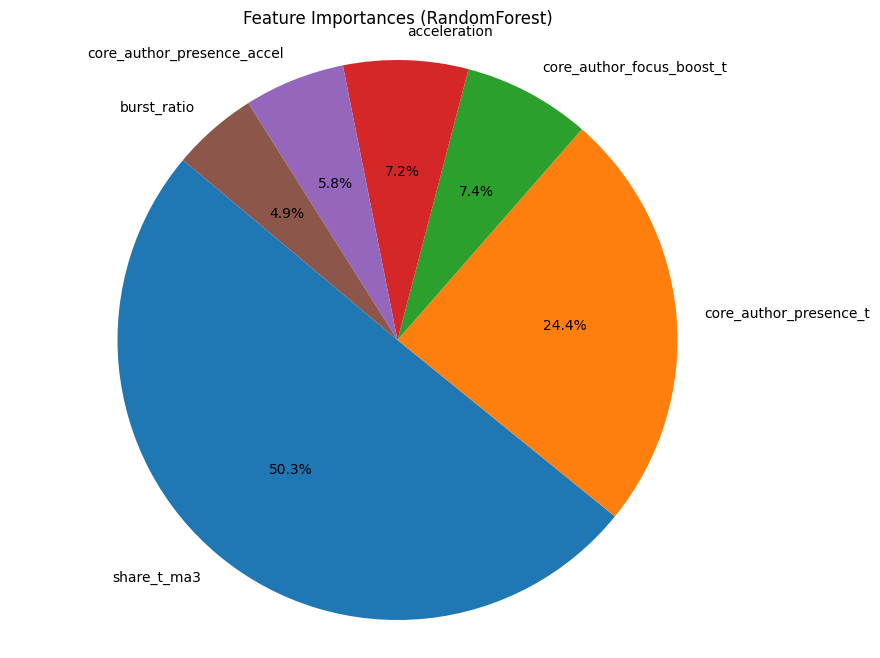

In [21]:
import matplotlib.pyplot as plt

model = clf_future_2018_result["model"]
feat_names = clf_future_2018_result["feature_cols_used"]
importances = model.feature_importances_

pairs = list(zip(feat_names, importances))
pairs.sort(key=lambda x: x[1], reverse=True)

print("=== Feature importances (RandomForest) ===")
for fname, imp in pairs:
    print(f"{fname}: {imp:.4f}")

# Extract feature names and importances for plotting
plot_names = [pair[0] for pair in pairs]
plot_importances = [pair[1] for pair in pairs]

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(plot_importances, labels=plot_names, autopct='%1.1f%%', startangle=140)
plt.title('Feature Importances (RandomForest)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Section 4b: Predict Popular Topics by Regressor



In [22]:
def reg_predict_future_year_no_ground_truth(
    df_no_text,
    topic_year,
    TOPIC_COL,
    CORE_MIN_PAPERS,
    TOP_PCT,
    RANDOM_STATE,
    TARGET_YEAR_FUTURE=2018,
    DOMINANT_SHARE_THRESHOLD=0.05,
):
    """
    Stand at cutoff year = TARGET_YEAR_FUTURE - 1.
    Use ONLY data up to and including that cutoff year.
    Predict each topic's share next year (TARGET_YEAR_FUTURE) via regression.

    This mirrors the classifier-style forecast but with a regressor:
    - Instead of outputting "probability of being hot",
      we output a predicted next_year_share.
    - We then surface two ranked views:
        (A) Who will dominate overall share next year?
        (B) Who will grow the fastest (relative growth ratio)?

    Unlike backtesting, here we assume we do NOT have ground truth
    for TARGET_YEAR_FUTURE, so we do not compute MAE/MSE.
    """

    # -------------------------------------------------
    # 0. Define forecast horizon
    # -------------------------------------------------
    TARGET_YEAR = TARGET_YEAR_FUTURE          # The year we want to forecast
    CUTOFF_YEAR = TARGET_YEAR - 1             # Last fully observed year

    print("\n" + "="*70)
    print(f"[PREDICT-REG] Forecasting {TARGET_YEAR} via regression using cutoff {CUTOFF_YEAR}")
    print("="*70)

    # -------------------------------------------------
    # 1. Step 1: per-year topic stats (topic × year counts and share)
    #
    #    ty_local columns include:
    #      - TOPIC_COL
    #      - year
    #      - count  (papers in that topic that year)
    #      - year_total
    #      - share  (count / year_total)
    #
    #    year_min/year_max help us constrain rolling windows if needed.
    # -------------------------------------------------
    ty_local, year_min, year_max = step1_build_per_year_topic_stats(
        df_no_text=df_no_text,
        topic_year=topic_year,
        TOPIC_COL=TOPIC_COL,
        CUTOFF_YEAR=CUTOFF_YEAR,
        TARGET_YEAR=TARGET_YEAR,
    )

    # -------------------------------------------------
    # 2. Step 2: identify "core authors"
    #
    #    Only use <= CUTOFF_YEAR to decide who is "core".
    #    Core authors are those publishing frequently in the last ~10 years.
    # -------------------------------------------------
    authors_exploded_local, core_authors_local = step2_identify_core_authors(
        df_no_text=df_no_text,
        year_min=year_min,
        CUTOFF_YEAR=CUTOFF_YEAR,
        CORE_MIN_PAPERS=CORE_MIN_PAPERS,
    )

    # -------------------------------------------------
    # 3. Step 3 (+3b): author-driven features
    #
    #    We summarize where influential authors (core_authors_local)
    #    are focusing:
    #      - core_author_presence_t
    #      - core_share_year_topic
    #      - core_author_focus_boost_t
    #      - core_author_presence_accel   (recent jump in core presence)
    #
    #    These are per (topic, year) for years <= CUTOFF_YEAR.
    # -------------------------------------------------
    feat_author_local = step3_build_author_features(
        authors_exploded=authors_exploded_local,
        core_authors=core_authors_local,
        CUTOFF_YEAR=CUTOFF_YEAR,
        TOPIC_COL=TOPIC_COL,
    )

    feat_author_boost_local = step3b_core_author_focus_dynamics(
        feat_author=feat_author_local,
        TOPIC_COL=TOPIC_COL,
    )

    # -------------------------------------------------
    # 4. Step 4: topic time-series features
    #
    #    For each (topic, year), build signals like:
    #      - share_t, share_t_ma3
    #      - acceleration
    #      - burst_ratio
    #      - etc.
    #
    #    All computed causally: year y only uses data up to y.
    # -------------------------------------------------
    topic_feat_raw_local = step4_build_topic_time_series_features(
        ty=ty_local,
        TOPIC_COL=TOPIC_COL,
    )

    # -------------------------------------------------
    # 5. Step 5: merge topic dynamics + author momentum,
    #            then keep only rows with year <= CUTOFF_YEAR.
    #
    #    This is the "world state at cutoff".
    # -------------------------------------------------
    features_full_local = step5_merge_topic_and_author_features(
        topic_feat_raw=topic_feat_raw_local,
        feat_author_boost=feat_author_boost_local,
        TOPIC_COL=TOPIC_COL,
        CUTOFF_YEAR=CUTOFF_YEAR,
    )

    # -------------------------------------------------
    # 6. Step 6: create regression targets and supervised splits
    #
    #    step6_build_labels_and_splits() is assumed to:
    #      - attach next_year_share for each (topic, year)
    #        (this is the topic's share in year+1; for missing topics,
    #         we treat next_year_share as 0.0 so we still get a label)
    #      - split into:
    #          train_df_local : all rows with year < CUTOFF_YEAR
    #          test_df_local  : rows with year == CUTOFF_YEAR
    #
    #    We DO NOT peek at TARGET_YEAR itself when constructing features:
    #    test_df_local is literally "topics as of CUTOFF_YEAR".
    # -------------------------------------------------
    full_features_local, train_df_local, test_df_local = step6_build_labels_and_splits(
        topic_feat_raw=topic_feat_raw_local,
        features_full=features_full_local,
        TOPIC_COL=TOPIC_COL,
        TOP_PCT=TOP_PCT,
        CUTOFF_YEAR=CUTOFF_YEAR,
        TARGET_YEAR=TARGET_YEAR,
    )

    # -------------------------------------------------
    # 7R. Train regression model to predict next_year_share
    #
    #    step7R_train_share_regressor() should:
    #      - fit a regressor (e.g. RandomForestRegressor with time weighting)
    #      - return:
    #           reg_local,
    #           y_pred_local,  # predicted next_year_share for test rows
    #           y_true_local,  # true next_year_share (this will exist historically,
    #                          # but for *future* TARGET_YEAR we conceptually won't use it)
    #           metrics_local  # { "MAE": ..., "MSE": ... }
    #
    #    Here for future-year mode, we *will* get y_true_local because
    #    step6_build_labels_and_splits still attached it from history.
    #    But in a real future deployment, y_true_local wouldn't exist yet.
    # -------------------------------------------------
    feature_cols_reg = [
        "share_t_ma3",
        # "share_t",
        "acceleration",
        "burst_ratio",
        "core_author_presence_t",
        "core_author_focus_boost_t",
        "core_author_presence_accel",
    ]

    reg_local, y_pred_local, y_true_local, metrics_local = step7R_train_share_regressor(
        train_df=train_df_local,
        test_df=test_df_local,
        feature_cols=feature_cols_reg,
        RANDOM_STATE=RANDOM_STATE,
    )

    # -------------------------------------------------
    # 8. Build report tables for TARGET_YEAR
    #
    #    We create two ranked lists for stakeholders:
    #
    #    (A) "Dominant next year": topics with highest predicted absolute share
    #        in TARGET_YEAR (pred_next_year_share).
    #
    #    (B) "Breakout next year": topics with highest predicted growth ratio
    #        relative to their current share_t at CUTOFF_YEAR.
    #
    #    We also surface a "high-confidence dominant" subset:
    #        topics the model believes will hold >= DOMINANT_SHARE_THRESHOLD
    #        of the entire field next year.
    # -------------------------------------------------
    out = test_df_local[[TOPIC_COL, "share_t"]].copy()
    out["display_label"] = out[TOPIC_COL].map(label_for_plot)

    # model forecast
    out["pred_next_year_share"] = y_pred_local

    # predicted relative growth ratio (avoid divide-by-zero)
    eps = 1e-6
    out["pred_growth_ratio"] = out["pred_next_year_share"] / (out["share_t"] + eps) - 1.0

    # (A) dominant list
    dominant_sorted = (
        out.sort_values("pred_next_year_share", ascending=False)
           .reset_index(drop=True)
    )
    top10_dom = dominant_sorted.head(10).copy()
    top10_dom.insert(0, "rank_pred_dom", range(1, len(top10_dom) + 1))

    print(f"\n=== [REG-FUTURE/ABS] Forecasted dominant topics in {TARGET_YEAR} (by predicted share) ===")
    print(
        top10_dom[[
            "rank_pred_dom",
            "display_label",
            "pred_next_year_share",
            "share_t",  # current share at cutoff
        ]].to_string(index=False)
    )

    # (B) breakout list
    growth_sorted = (
        out.sort_values("pred_growth_ratio", ascending=False)
           .reset_index(drop=True)
    )
    top10_growth = growth_sorted.head(10).copy()
    top10_growth.insert(0, "rank_pred_growth", range(1, len(top10_growth) + 1))

    print(f"\n=== [REG-FUTURE/GROWTH] Fastest predicted risers into {TARGET_YEAR} (growth ratio) ===")
    print(
        top10_growth[[
            "rank_pred_growth",
            "display_label",
            "pred_growth_ratio",
            "share_t",
            "pred_next_year_share",
        ]].to_string(index=False)
    )

    # High-confidence dominant set:
    # "hard bets" that this topic will be a large slice of the field next year.
    highconf_mask = (out["pred_next_year_share"] >= DOMINANT_SHARE_THRESHOLD)
    highconf_tbl = (
        out[highconf_mask]
        .sort_values("pred_next_year_share", ascending=False)
        .reset_index(drop=True)
        .copy()
    )
    highconf_tbl.insert(0, "rank_conf_dom", range(1, len(highconf_tbl) + 1))

    print(f"\n=== High-Confidence Dominant Bets for {TARGET_YEAR} (pred_next_year_share >= {DOMINANT_SHARE_THRESHOLD}) ===")
    if len(highconf_tbl) == 0:
        print("  [None] (No topics exceeded the dominance threshold)")
    else:
        print(
            highconf_tbl[[
                "rank_conf_dom",
                "display_label",
                "pred_next_year_share",
                "share_t",
                "pred_growth_ratio",
            ]].to_string(index=False)
        )

    print("\n[NOTE]")
    print(f"- 'pred_next_year_share' is the model's guess of the topic's overall share in {TARGET_YEAR}.")
    print(f"- 'pred_growth_ratio' estimates relative jump vs {CUTOFF_YEAR}.")
    print(f"- We only used data up to {CUTOFF_YEAR}; {TARGET_YEAR} itself was never used to fit features.")
    print("- There is no MAE/MSE here because we assume we don't yet know the real {TARGET_YEAR} values.")

    return {
        "TARGET_YEAR": TARGET_YEAR,
        "CUTOFF_YEAR": CUTOFF_YEAR,
        "dominant_top10": top10_dom,
        "growth_top10": top10_growth,
        "highconf_dominant": highconf_tbl,
        "all_predictions": out.sort_values("pred_next_year_share", ascending=False),
        "model": reg_local,
        "feature_cols_used": feature_cols_reg,
    }


# ===== RUN reg future forecast NOW =====
reg_future_2018_result = reg_predict_future_year_no_ground_truth(
    df_no_text=df_no_text,
    topic_year=topic_year,
    TOPIC_COL=TOPIC_COL,
    CORE_MIN_PAPERS=5,
    TOP_PCT=0.25,
    RANDOM_STATE=RANDOM_STATE,
    TARGET_YEAR_FUTURE=2018,          # forecast the field structure in 2018
    DOMINANT_SHARE_THRESHOLD=0.05,    # "hard bet" cutoff for dominant topics
)



[PREDICT-REG] Forecasting 2018 via regression using cutoff 2017
[INFO] Data year range: 1987 .. 2017
[INFO] Training cutoff year: 2017  -> Forecast target year: 2018
[INFO] ty head:
           topic_label  year  count  year_total     share
0  优化算法 (Optimization)  1987      1          90  0.011111
1  优化算法 (Optimization)  1989      2         101  0.019802
2  优化算法 (Optimization)  1990      3         143  0.020979
3  优化算法 (Optimization)  1991      4         144  0.027778
4  优化算法 (Optimization)  1992      2         127  0.015748
[INFO] Core-author window: 2008..2017
[INFO] #core_authors (>= 5 papers in window): 480
[INFO] Sample top authors by volume:
[('Michael I. Jordan', 43), ('Lawrence Carin', 38), ('Pradeep K. Ravikumar', 36), ('Ruslan R. Salakhutdinov', 32), ('Inderjit S. Dhillon', 32)]
[INFO] feat_author head:
           topic_label  year  core_author_presence_t  core_papers  \
0  优化算法 (Optimization)  1992                       1            1   
1  优化算法 (Optimization)  1993         

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3102400425.py:66: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_focus_boost)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\1466964769.py:118: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(build_topic_time_features)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\3862480789.py:95: FutureWarning: DataFrameGroupBy.apply operated on the grou

[INFO] topic_feat_raw head:
           topic_label  year  count  year_total     share  count_t   share_t  \
0  优化算法 (Optimization)  1987      1          90  0.011111        1  0.011111   
1  优化算法 (Optimization)  1989      2         101  0.019802        2  0.019802   
2  优化算法 (Optimization)  1990      3         143  0.020979        3  0.020979   
3  优化算法 (Optimization)  1991      4         144  0.027778        4  0.027778   
4  优化算法 (Optimization)  1992      2         127  0.015748        2  0.015748   

   share_t_ma3  acceleration  trend_slope_5y  volatility_5y  burst_ratio  
0     0.011111      0.000000        0.000000       0.000000     1.000000  
1     0.015457      0.008691        0.004345       0.281139     1.281139  
2     0.020391      0.001177        0.003440       0.254412     1.028862  
3     0.022853      0.006799        0.003931       0.297535     1.215502  
4     0.021502     -0.012030       -0.000536       0.205355     0.732412  
[INFO] features_full head (after merge & 

=== Feature importances (RandomForest Classifier) ===
share_t_ma3: 0.5026
core_author_presence_t: 0.2441
core_author_focus_boost_t: 0.0736
acceleration: 0.0721
core_author_presence_accel: 0.0582
burst_ratio: 0.0494

=== Feature importances (RandomForest Regressor) ===
share_t_ma3: 0.6497
core_author_presence_accel: 0.1332
core_author_focus_boost_t: 0.0723
core_author_presence_t: 0.0559
burst_ratio: 0.0447
acceleration: 0.0443


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23724\2051186361.py:93: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0, 0]) # Adjust layout to make space for legends and move titles up


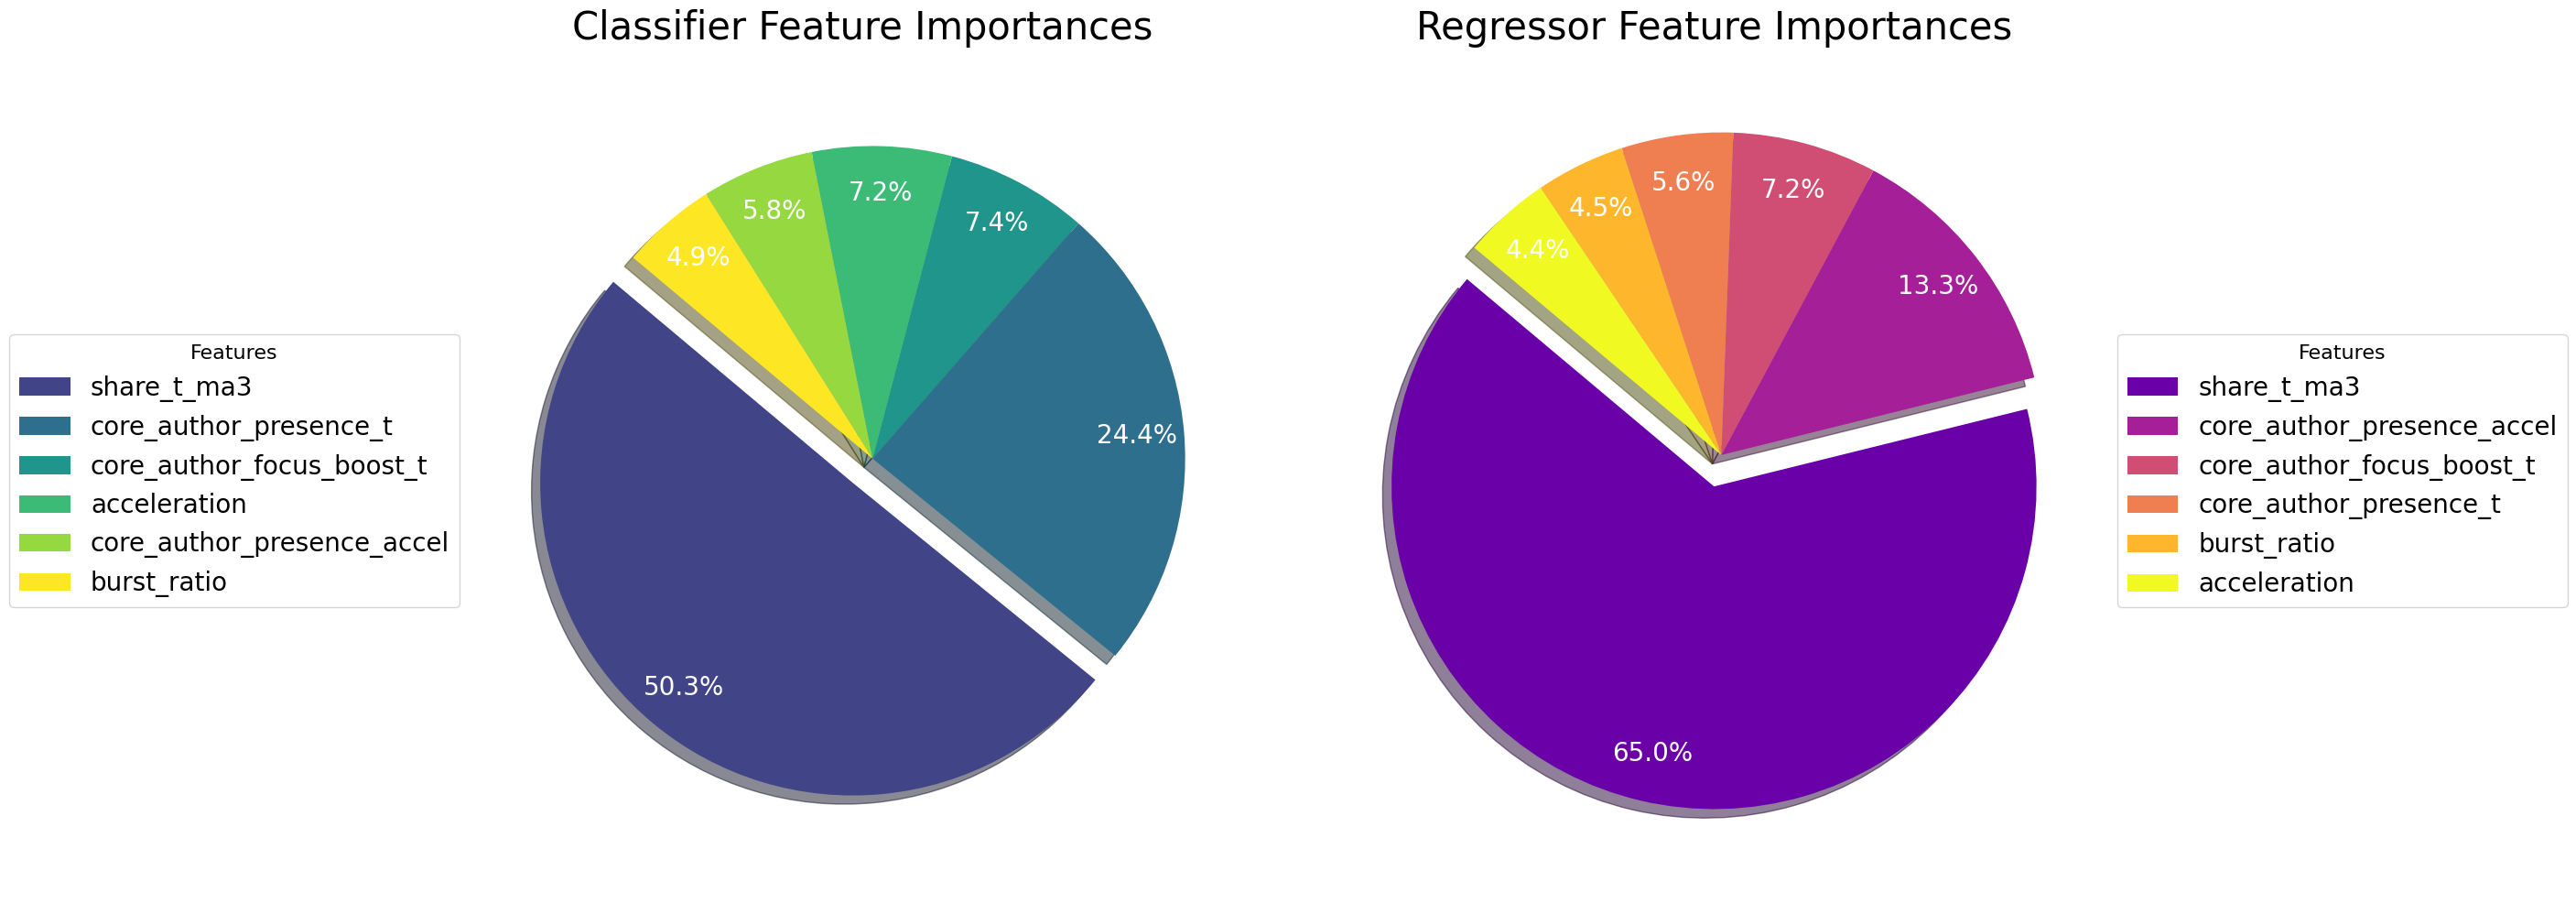

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Classifier feature importances
clf_model = clf_future_2018_result["model"]
clf_feat_names = clf_future_2018_result["feature_cols_used"]
clf_importances = clf_model.feature_importances_

clf_pairs = list(zip(clf_feat_names, clf_importances))
clf_pairs.sort(key=lambda x: x[1], reverse=True)

print("=== Feature importances (RandomForest Classifier) ===")
for fname, imp in clf_pairs:
    print(f"{fname}: {imp:.4f}")

# Regressor feature importances
reg_model = reg_future_2018_result["model"]
reg_feat_names = reg_future_2018_result["feature_cols_used"]
reg_importances = reg_model.feature_importances_

reg_pairs = list(zip(reg_feat_names, reg_importances))
reg_pairs.sort(key=lambda x: x[1], reverse=True)

print("\n=== Feature importances (RandomForest Regressor) ===")
for fname, imp in reg_pairs:
    print(f"{fname}: {imp:.4f}")


# Extract feature names and importances for plotting
clf_plot_names = [pair[0] for pair in clf_pairs]
clf_plot_importances = [pair[1] for pair in clf_pairs]

reg_plot_names = [pair[0] for pair in reg_pairs]
reg_plot_importances = [pair[1] for pair in reg_pairs]

# Optional: Create a slight 'explode' effect for the largest slice
clf_explode = [0.1 if i == 0 else 0 for i in range(len(clf_plot_importances))]
reg_explode = [0.1 if i == 0 else 0 for i in range(len(reg_plot_importances))]

# Define different color maps
colors1 = mpl.cm.viridis(np.linspace(0.2, 1, len(clf_plot_names)))
colors2 = mpl.cm.plasma(np.linspace(0.2, 1, len(reg_plot_names)))


# Create comparative pie charts
fig, axes = plt.subplots(1, 2, figsize=(22, 12)) # Adjusted figsize for labels on the side and larger text


# Classifier pie chart (Left)
wedges1, texts1, autotexts1 = axes[0].pie(clf_plot_importances, autopct='%1.1f%%', startangle=140,
                                          shadow=True, explode=clf_explode, colors=colors1,
                                          pctdistance=0.85, textprops={'fontsize': 14}) # Increase text font size

# Move percentage labels closer to the center
for autotext in autotexts1:
    autotext.set_color('white') # Make text white for better visibility
    autotext.set_fontsize(20) # Increase font size for percentages


axes[0].set_title('Classifier Feature Importances', fontsize=30) # Increase title font size
axes[0].axis('equal')

# Add labels outside the pie chart on the left
axes[0].legend(wedges1, clf_plot_names,
               title="Features",
               loc="center right", # Position legend on the right of the first plot
               bbox_to_anchor=(-0.05, 0.5), # Adjust bbox to place it to the left
               fontsize=20, title_fontsize=16) # Increase legend font size


# Regressor pie chart (Right)
wedges2, texts2, autotexts2 = axes[1].pie(reg_plot_importances, autopct='%1.1f%%', startangle=140,
                                          shadow=True, explode=reg_explode, colors=colors2,
                                          pctdistance=0.85, textprops={'fontsize': 14}) # Increase text font size

# Move percentage labels closer to the center
for autotext in autotexts2:
    autotext.set_color('white') # Make text white for better visibility
    autotext.set_fontsize(20) # Increase font size for percentages

axes[1].set_title('Regressor Feature Importances', fontsize=30) # Increase title font size
axes[1].axis('equal')

# Add labels outside the pie chart on the right
axes[1].legend(wedges2, reg_plot_names,
               title="Features",
               loc="center left", # Position legend on the left of the second plot
               bbox_to_anchor=(1.05, 0.5), # Adjust bbox to place it to the right
               fontsize=20, title_fontsize=16) # Increase legend font size


plt.tight_layout(rect=[0, 0, 0, 0]) # Adjust layout to make space for legends and move titles up
plt.show()